# STAT40800 Data Programming with Python (online)
## Final project

### *Author - Sarosh Farhan (24210969)*

<div style="page-break-after: always;"></div>

# Importing all libraries

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.stats import f_oneway

<div style="page-break-after: always;"></div>

# Question 1

### (a) Load the winequality-red.csv dataset into Python as a pandas DataFrame.

In [128]:
#loading the red wine data in a pandas dataframe
redWine = pd.read_csv("winequality-red.csv", delimiter=";")

I used `pd.read_csv` to load the data for red wine, also, by looking at the data beforehand using a text editor I found that the data is delimited by `;` and thus have used `delimiter=";"` as the parameter for  `read_csv()`.

## (b) Inspect the data. How many wines are included in this dataset? How many different indicators are included? Does this dataset contain any missing values?

In [129]:
#getting a peek at data and columns
print(redWine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [130]:
#getting the number of rows and column
redWine.shape

(1599, 12)

In [131]:
#to check if thre are NA values or not
redWine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Answer:**
<br>
Number of wines included in the dataset is 1599, as seen from the `shape` output<br>
<br>
*How many different indicators are included?* 
<br>
The number of indicators included in the red wines' dataframe are 11 with 1 output indicator.<br>
<br>
*Does this dataset contain any missing values?*
<br>
This dataset does not have missing values.


In [132]:
redWine.duplicated().sum()

240

But we see there are 240 dulicate values and I need to remove them.

In [133]:
redWine.drop_duplicates(inplace=True);

Using `drop_duplicates()` I remove the duplicate data.

## (c) Perform an exploratory data analysis, creating both numerical and graphical summaries of the data. Discuss and interpret your results.

### Numerical Summary

In [134]:
#seperating only the numerica data for summary
wineNumerical = pd.read_csv("winequality-red.csv",
                             delimiter=";", 
                             usecols=[0,1,2,3,4,5,6,7,8,9,10])
print(wineNumerical.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  


In [135]:
#printing the statistics of the numerical data
print(wineNumerical.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

The summary statistics of red wine reveal some important insights into the chemical composition of the wine.<br>
<br>

**Fixed Acidity**<br>
Mean - 8.31 and ranging from min - 4.6 to max - 15.9. This indicates average fixed acidity levels are moderate, the wide range suggests diversity in wine styles with some wines being acidic and some less acidic.<br>
<br>

**Volatile Acidity**<br>
Mean - 0.52 and ranging from min - 0.12 to max - 1.58. The average volatile acid is under acceptable limits (0.7 g/L [$^{[1]}$](https://extension.psu.edu/volatile-acidity-in-wine)) for quality wines but the maximum value (1.58) could indicate potential flaws in some samples. Wines with volatile acidity above 0.7 g/L may start to develop undesirable flavors due to development of Acetic acid. [$^{[2]}$](https://enology.umn.edu/news/volatile-acidity-wine-making)<br>
<br>

**Citric Acid**<br>
Mean - 0.27 and ranging from min - 0.00 to max 1.00. The l0wer mean of citric acid suggests that most wines are not particularly citrusy.<br>
<br>

**Residual Sugar**<br>
Mean - 2.53 and min - 0.90 and max - 15.5. The mean residual sugar indicates that these wines are somewhat bitter, however there are some wines with more residual sugars and the range is also wide which suggests a variety of wine types including some sweeter ones.<br>
<br>

**Chlorides**<br>
Mean - 0.087 and min - 0.012 and max - 0.611. The mean chloride level is low signaling less saltiness in wine which is desired for good flavour and we also see a low maximum value as compared to other metrics idicating this is the desirable trait in winemaking to keep chorides or salty flavour low which makes sense.<br>
<br>

**Free Sulfur Dioxide**<br>
Mean - 15.87 and min - 1.00 and max - 72.00. The free $SO_2$ level is typical for wine preservation, helping it prevent from oxidation and spoilage, this is dependent on pH levels of wine as well[$^{[3]}$](https://extension.okstate.edu/fact-sheets/understanding-free-sulfur-dioxide-fso2-in-wine.html) and the max value suggests that there are varied pH level wines or the winemakers may be using agressive presevariuon techniques.<br>
<br>

**Total Sulfur Dioxide**<br>
Mean - 46.46 and min - 6.00 and max - 289.0. Similar to free sulfur dioxide, total sulfur dioxide levels suggests careful preservation techniques but higer sulfur content(289.0) might affect taste of the wine.<br>
<br>

**Density**<br>
Mean -  0.996, min - 0.990 and max - 1.003. We see that mean and minimum and maximum values are closer to one another which are in range of alcoholic beverages.<br>
<br>

**pH**<br>
Mean -  3.31, min - 2.74 and max - 4.01. Looking at the mean of 3.31 we see that most of the wines are acidic to moderately acidic. The max value of 4.01 suggests there are some softer wines that are less acidic.<br>
<br>

**Sulfates**<br>
Mean - 0.658, min - 0.33 and max - 2.00. This is also same as the sulfur content and used for wine preservation, mean value suggests better approach for winemaking was used.<br>
<br>

**Alcohol**<br>
Mean - 10.42, min - 8.400 and max - 14.90. The mean alcohol content indicates these wines are generally moderate in strength.<br>


### Graphical Summary

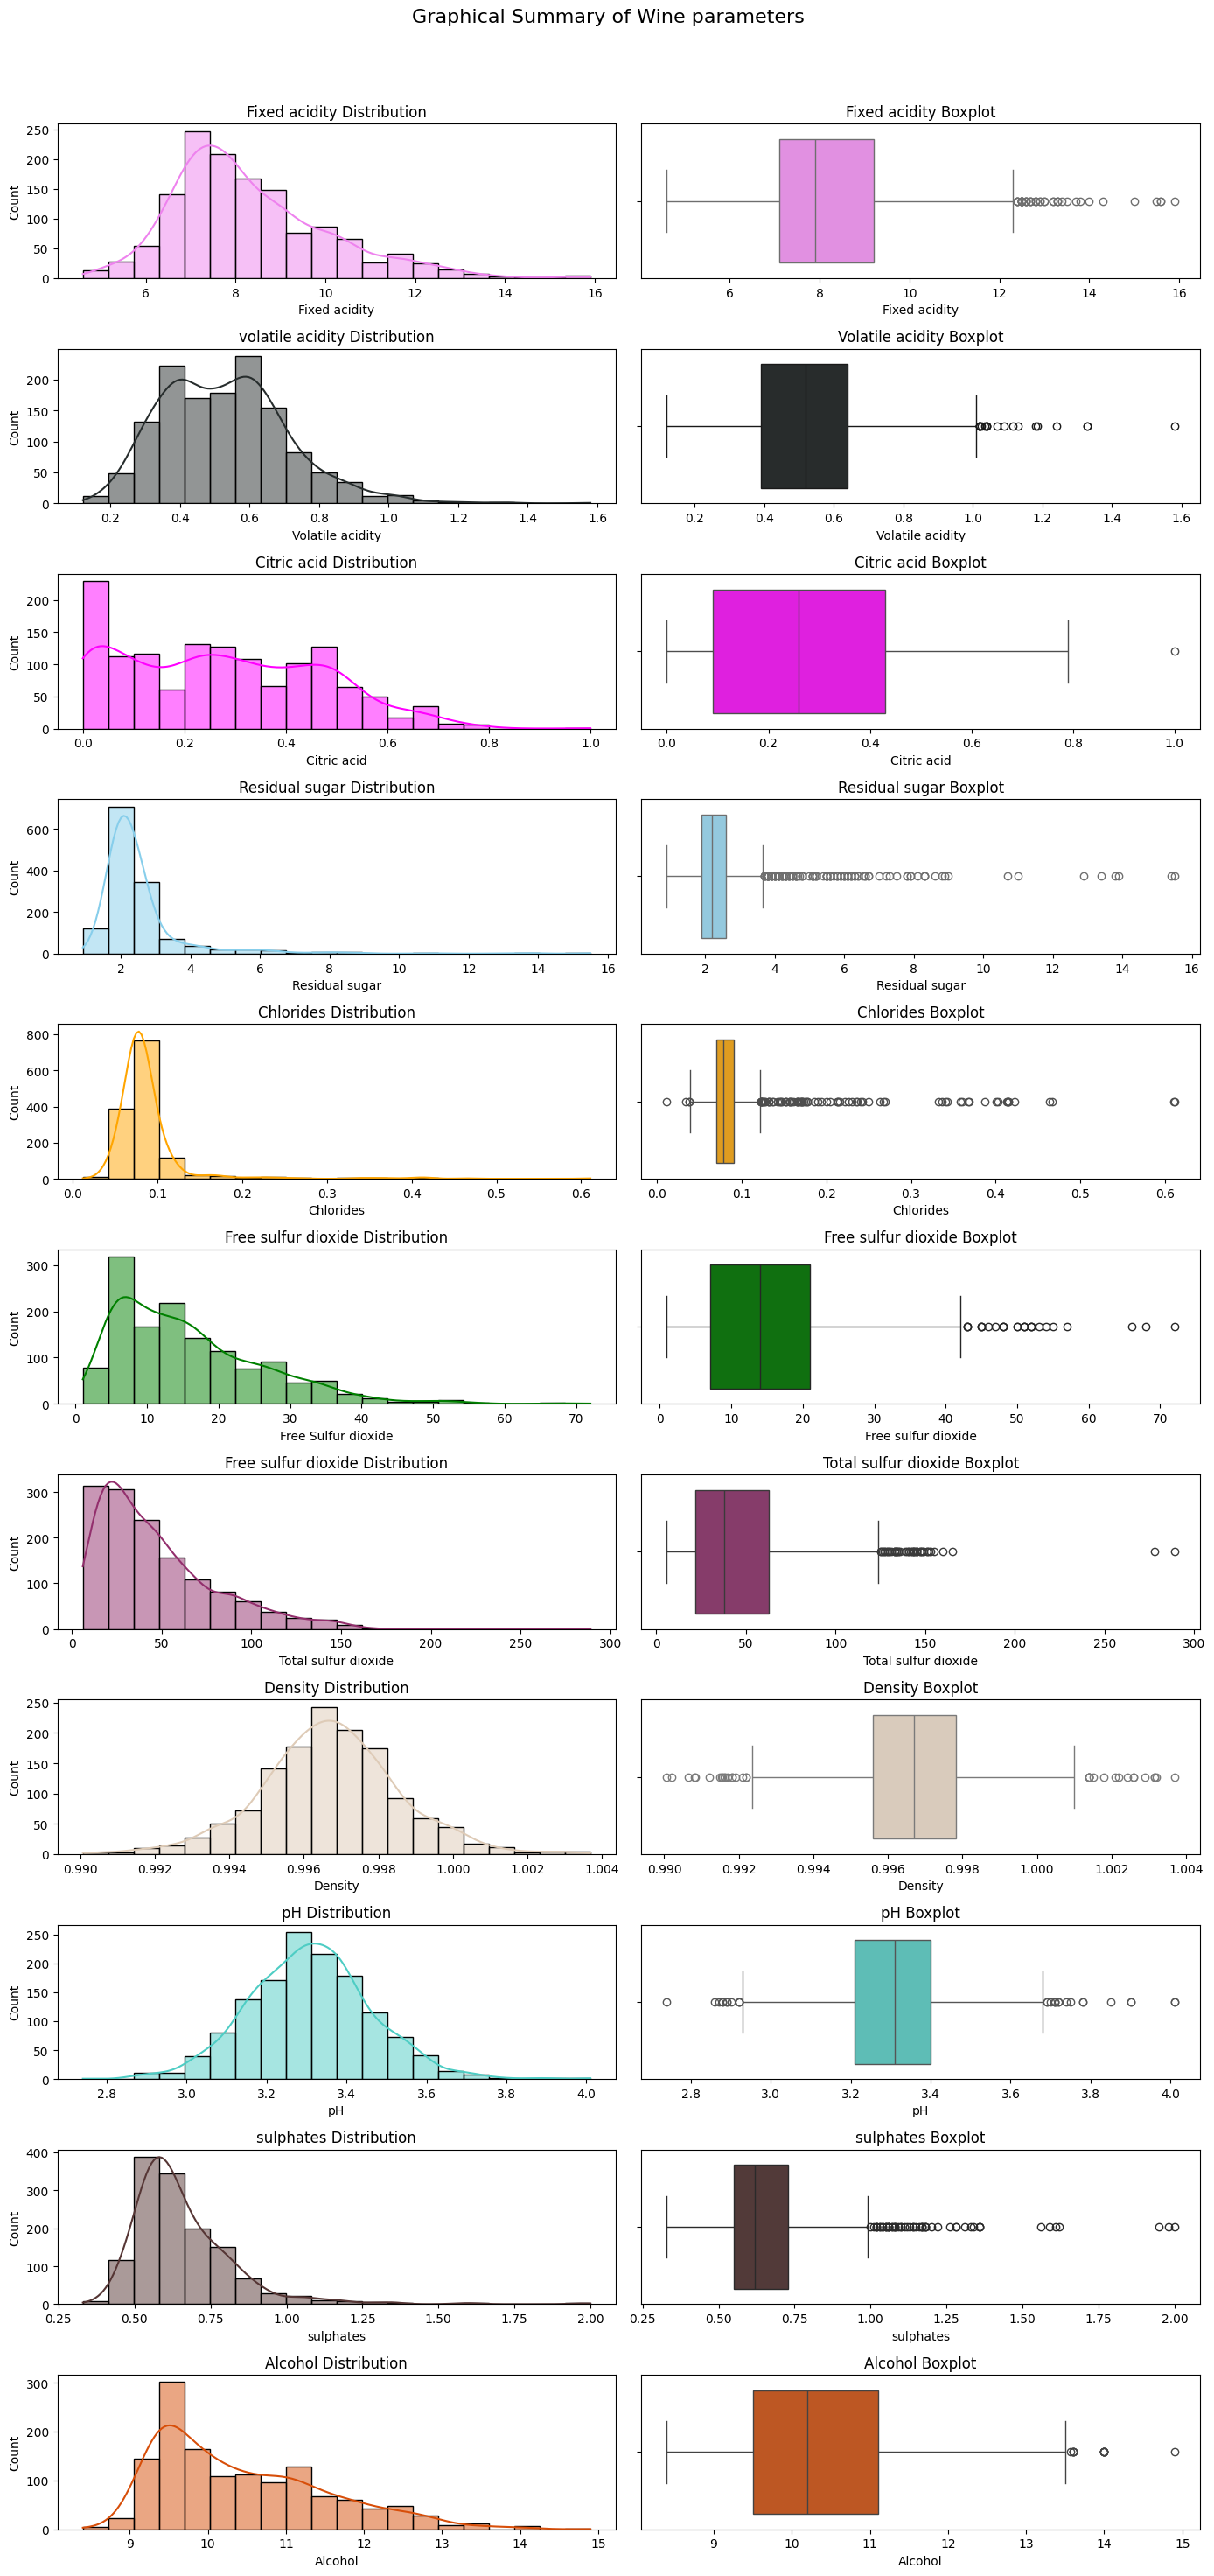

In [136]:
#Create subplots
fig, axs = plt.subplots(11, 2, figsize=(14, 30))
fig.suptitle('Graphical Summary of Wine parameters', fontsize=16)

#Fixed acidity - Histogram and Boxplot
sns.histplot(redWine["fixed acidity"], bins=20, ax=axs[0, 0], 
             color='violet', kde=True)
axs[0, 0].set_xlabel('Fixed acidity')
axs[0, 0].set_title('Fixed acidity Distribution')
sns.boxplot(x=redWine["fixed acidity"], 
            ax=axs[0, 1], color='violet')
axs[0, 1].set_xlabel('Fixed acidity')
axs[0, 1].set_title('Fixed acidity Boxplot')

#volatile acidity - Histogram and Boxplot
sns.histplot(redWine["volatile acidity"], bins=20, ax=axs[1, 0], 
             color='#272D2D', kde=True)
axs[1, 0].set_xlabel('Volatile acidity')
axs[1, 0].set_title('volatile acidity Distribution')
sns.boxplot(x=redWine["volatile acidity"], 
            ax=axs[1, 1], color='#272D2D')
axs[1, 1].set_xlabel('Volatile acidity')
axs[1, 1].set_title('Volatile acidity Boxplot')

#citric acid - Histogram and Boxplot
sns.histplot(redWine["citric acid"], bins=20, ax=axs[2, 0], 
             color='magenta', kde=True)
axs[2, 0].set_xlabel('Citric acid')
axs[2, 0].set_title('Citric acid Distribution')
sns.boxplot(x=redWine["citric acid"], 
            ax=axs[2, 1], color='magenta')
axs[2, 1].set_xlabel('Citric acid')
axs[2, 1].set_title('Citric acid Boxplot')

#residual sugar - Histogram and Boxplot
sns.histplot(redWine["residual sugar"], bins=20, ax=axs[3, 0], 
             color='skyblue', kde=True)
axs[3, 0].set_xlabel("Residual sugar")
axs[3, 0].set_title('Residual sugar Distribution')
sns.boxplot(x=redWine["residual sugar"], 
            ax=axs[3, 1], color='skyblue')
axs[3, 1].set_xlabel('Residual sugar')
axs[3, 1].set_title('Residual sugar Boxplot')

#chlorides - Histogram and Boxplot
sns.histplot(redWine["chlorides"], bins=20, ax=axs[4, 0], 
             color='orange', kde=True)
axs[4, 0].set_xlabel('Chlorides')
axs[4, 0].set_title('Chlorides Distribution')
sns.boxplot(x=redWine["chlorides"], 
            ax=axs[4, 1], color='orange')
axs[4, 1].set_xlabel('Chlorides')
axs[4, 1].set_title('Chlorides Boxplot')

#free sulfur dioxide - Histogram and Boxplot
sns.histplot(redWine["free sulfur dioxide"], bins=20, ax=axs[5, 0], 
             color='green', kde=True)
axs[5, 0].set_xlabel('Free Sulfur dioxide')
axs[5, 0].set_title('Free sulfur dioxide Distribution')
sns.boxplot(x=redWine["free sulfur dioxide"], 
            ax=axs[5, 1], color='green')
axs[5, 1].set_xlabel('Free sulfur dioxide')
axs[5, 1].set_title('Free sulfur dioxide Boxplot')

#total sulfur dioxide - Histogram and Boxplot
sns.histplot(redWine["total sulfur dioxide"], bins=20, ax=axs[6, 0], 
             color='#932F6D', kde=True)
axs[6, 0].set_xlabel('Total sulfur dioxide')
axs[6, 0].set_title('Free sulfur dioxide Distribution')
sns.boxplot(x=redWine["total sulfur dioxide"], 
            ax=axs[6, 1], color='#932F6D')
axs[6, 1].set_xlabel('Total sulfur dioxide')
axs[6, 1].set_title('Total sulfur dioxide Boxplot')

#density - Histogram and Boxplot
sns.histplot(redWine["density"], bins=20, ax=axs[7, 0], 
             color='#DECBB7', kde=True)
axs[7, 0].set_xlabel('Density')
axs[7, 0].set_title('Density Distribution')
sns.boxplot(x=redWine["density"], 
            ax=axs[7, 1], color='#DECBB7')
axs[7, 1].set_xlabel('Density')
axs[7, 1].set_title('Density Boxplot')

#pH - Histogram and Boxplot
sns.histplot(redWine["pH"], bins=20, ax=axs[8, 0], 
             color='#4ECDC4', kde=True)
axs[8, 0].set_xlabel('pH')
axs[8, 0].set_title('pH Distribution')
sns.boxplot(x=redWine["pH"], 
            ax=axs[8, 1], color='#4ECDC4')
axs[8, 1].set_xlabel('pH')
axs[8, 1].set_title('pH Boxplot')

#sulphates - Histogram and Boxplot
sns.histplot(redWine["sulphates"], bins=20, ax=axs[9, 0], 
             color='#563635', kde=True)
axs[9, 0].set_xlabel('sulphates')
axs[9, 0].set_title('sulphates Distribution')
sns.boxplot(x=redWine["sulphates"], 
            ax=axs[9, 1], color='#563635')
axs[9, 1].set_xlabel('sulphates')
axs[9, 1].set_title('sulphates Boxplot')

#alcohol - Histogram and Boxplot
sns.histplot(redWine["alcohol"], bins=20, ax=axs[10, 0], 
             color='#D74E09', kde=True)
axs[10, 0].set_xlabel('Alcohol')
axs[10, 0].set_title('Alcohol Distribution')
sns.boxplot(x=redWine["alcohol"], 
            ax=axs[10, 1], color='#D74E09')
axs[10, 1].set_xlabel('Alcohol')
axs[10, 1].set_title('Alcohol Boxplot')

#aligning padding for better readability
plt.tight_layout(rect=[0, 0, 1, 0.96])



The above graphical summary provides detailed information about various parameters and characteristics of red wine samples. Here are some key inferences that can be drawn from the visualizations:<br>
<br>

**Fixed Acidity**<br>
*Histogram* - The distribution is right-skewed, indicating that most wines have relatively low fixed acidity, with a long tail of wines with higher acidity.<br>
*Boxplot* - Outliers exist on the higher end (>12) suggesting a wide range of wine types.<br>
<br>

**Volatile Acidity**<br>
*Histogram* - The distribution seems not to follow normal distribution, some major values are at 0.3 and most of the values seems to be around 0.6.<br>
*Boxplot* - A few outliers are present on the higher side (>1.2). These may have slighpy different taste<br>
<br>

**Citric Acid**<br>
*Histogram* - The distribution seems not to follow normal distribution, indicating that most values are even;y distributes suggesting different wine making techniques.<br>
*Boxplot* - Outliers are least for this parameter suggesting a wide range of wine making techniques.<br>
<br>

**Residual Sugar**<br>
*Histogram* - Heavily skewed to the right, with most values concentrated below 4<br>
*Boxplot* - Several outliers above 6, indicating a minority of wines with significantly higher sugar levels.<br>
<br>

**Chlorides**<br>
*Histogram* -  A sharp peak at lower values (<0.1), indicating most wines have low chloride levels.<br>
*Boxplot* - Significant outliers are present above 0.2.<br>
<br>

**Free Sulfur Dioxide**<br>
*Histogram* -  The distribution is right-skewed with most wines having values below 40.<br>
*Boxplot* - Shows a wide range of free sulfur dioxide levels, with some high outliers.<br>
<br>

**Total Sulfur Dioxide**<br>
*Histogram* -  Skewed right, with most values below 150.<br>
*Boxplot* - Several outliers above 200.<br>
<br>

**Density**<br>
*Histogram* -  Symmetrical and normal-like, centered around 0.996.<br>
*Boxplot* - Outliers exist on both the lower and higher ends.<br>
<br>

**pH**<br>
*Histogram* -  Nearly normal, with most values between 3.1 and 3.4.<br>
*Boxplot* - Few outliers on both sides, but not extreme.<br>
<br>

**Sulphates**<br>
*Histogram* -  Right skewed, with most wines containing between 0.5 and 1.0<br>
*Boxplot* - A few extreme outliers above 1.5.<br>
<br>

**Alcohol**<br>
*Histogram* -  Slightly skewed right, with most wines between 9 and 12 units<br>
*Boxplot* -  Some outliers are present above 13.5.<br>
<br>

<div style="page-break-after: always;"></div>

# Question 2

## (a) Load the winequality-white.csv dataset into Python as a pandas DataFrame.

In [137]:
whiteWine = pd.read_csv("winequality-white.csv", delimiter=";")

Loaded the white wine quality data and stored it in pandas dataframe.

## (b) Inspect the data. How many wines are included in this dataset? Are the indicators the same as those in the red wine group?

In [138]:
print(whiteWine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [139]:
print(f"Number of wines included in this dataset is {whiteWine.shape[0]}")

Number of wines included in this dataset is 4898


In [140]:
whiteWine.duplicated().sum()

937

I also found 937 duplicate data in the dataframe and thus removed it all.

In [141]:
whiteWine.drop_duplicates(inplace=True);

In [142]:
common_cols = redWine.columns.intersection(whiteWine.columns)

if(len(common_cols) ==  len(redWine.columns) 
   and len(common_cols) == len(whiteWine.columns)):
    print("Both the datasets have the same number of indicators")
else:
    print("Both the datasets don't have the same number of indicators")

Both the datasets have the same number of indicators


I used `intersection()` method to check if there are any differences in the indiator to the column. Looking at the above output we see that the indicators are the same.

## (c) Perform a t-test, for each of the measurements, to test whether any of the indicators differ between the red and the white groups. Use a significance level of $\alpha = 0.01$. Display the t-score  and p-value for each measurement. Clearly state the conclusion of your tests and explain your reasoning.

In [143]:
alpha = 0.01
results = []
for col in common_cols:
        # Perform independent t-test
        t_stat, p_value = stats.ttest_ind(redWine[col], whiteWine[col])
        
        # Calculate means
        red_mean = redWine[col].mean()
        white_mean = whiteWine[col].mean()
        
        # Determine if difference is significant
        is_significant = p_value < alpha
        
        # Store results
        results.append({
            'Measurement': col,
            'T-statistic': t_stat,
            'P-value': p_value,
            'Red Mean': red_mean,
            'White Mean': white_mean,
            'Mean Difference': red_mean - white_mean,
            'Significant': is_significant
        })
    
# Create results DataFrame
results_df = pd.DataFrame(results)
    
# Format results
results_df['T-statistic'] = results_df['T-statistic'].round(4)
results_df['P-value'] = results_df['P-value'].apply(lambda x: f'{x:.4e}')
results_df['Red Mean'] = results_df['Red Mean'].round(4)
results_df['White Mean'] = results_df['White Mean'].round(4)
results_df['Mean Difference'] = results_df['Mean Difference'].round(4)

significant_tests = results_df[results_df['Significant']]
non_significant_tests = results_df[~results_df['Significant']]
    
print(f"\nAnalysis Summary (α = {alpha}):")
print(f"- {len(significant_tests)} measurements showed significant differences")
print(f"- {len(non_significant_tests)} measurements showed no significant differences")
    
print("\nSignificant Differences:")
for _, row in significant_tests.iterrows():
    diff = row['Mean Difference']
    direction = "higher" if diff > 0 else "lower"
    print(f"- {row['Measurement']}: Red wines are {direction} by {abs(diff):.4f} units "
              f"(t = {row['T-statistic']}, p = {row['P-value']})")
    
if len(non_significant_tests) > 0:
    print("\nNo Significant Differences:")
    for _, row in non_significant_tests.iterrows():
        print(f"- {row['Measurement']}: t = {row['T-statistic']}, p = {row['P-value']}")


Analysis Summary (α = 0.01):
- 12 measurements showed significant differences
- 0 measurements showed no significant differences

Significant Differences:
- fixed acidity: Red wines are higher by 1.4712 units (t = 40.5803, p = 0.0000e+00)
- volatile acidity: Red wines are higher by 0.2489 units (t = 61.606, p = 0.0000e+00)
- citric acid: Red wines are lower by 0.0620 units (t = -13.6327, p = 1.2727e-41)
- residual sugar: Red wines are lower by 3.3914 units (t = -25.3802, p = 3.0866e-134)
- chlorides: Red wines are higher by 0.0422 units (t = 42.0488, p = 0.0000e+00)
- free sulfur dioxide: Red wines are lower by 18.9959 units (t = -38.3372, p = 3.7927e-284)
- total sulfur dioxide: Red wines are lower by 90.3675 units (t = -70.3384, p = 0.0000e+00)
- density: Red wines are higher by 0.0029 units (t = 34.6709, p = 1.1852e-237)
- pH: Red wines are higher by 0.1143 units (t = 23.856, p = 1.3818e-119)
- sulphates: Red wines are higher by 0.1684 units (t = 41.0314, p = 0.0000e+00)
- alcohol:

## (d) Compare the two data sets using appropriate graphical means.

<a id="2d"></a>

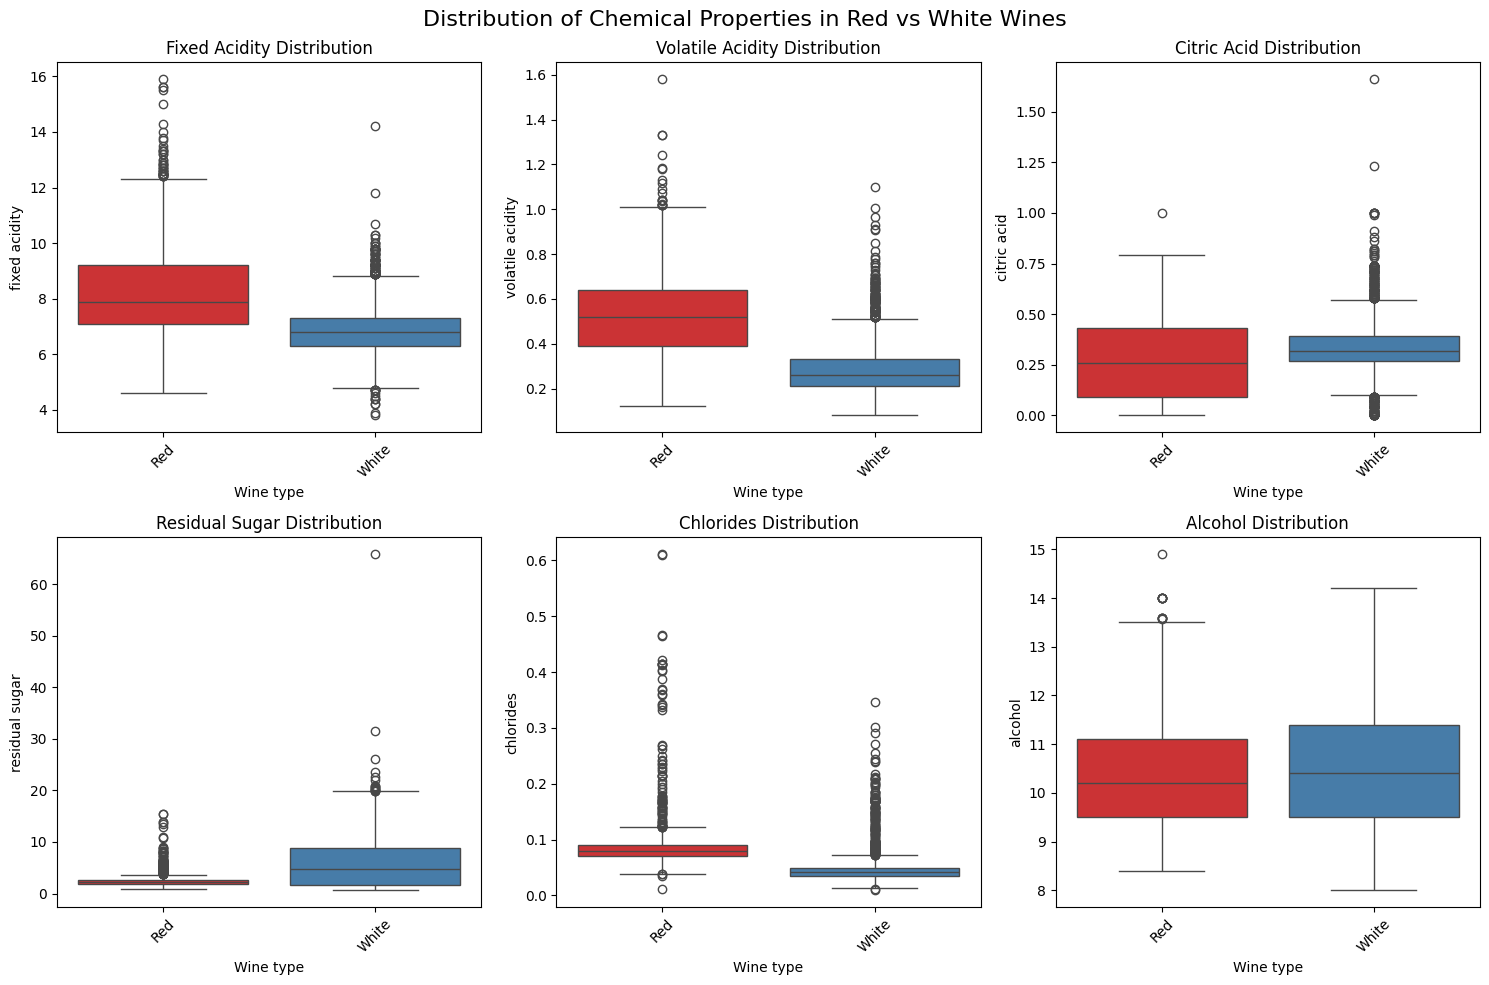

In [144]:
# Add a new column to each dataset to indicate wine type
redWine['wine_type'] = 'Red'
whiteWine['wine_type'] = 'White'

# Concatenate the datasets
combinedWine = pd.concat([redWine, whiteWine], axis=0)

# Box plots for chemical properties
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of Chemical Properties in Red vs White Wines', 
             fontsize=16)
    
chemicalProperties = ['fixed acidity', 'volatile acidity', 'citric acid', 
                         'residual sugar', 'chlorides', 'alcohol']

# Plotting the box plot with a loop with all propertirs   
for i, property in enumerate(chemicalProperties, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(x='wine_type', y=property,
                     data=combinedWine, hue='wine_type', palette='Set1')
        plt.xlabel("Wine type")
        plt.title(f'{property.title()} Distribution')
        plt.xticks(rotation=45)
    
plt.tight_layout()

### Inferences from the box plots

**Fixed Acidity**<br>
Red wines tend to have higher fixed acidity levels compared to white wines.
Both types show variability, with some outliers present.<br>
<br>

**Volatile Acidity**<br>
White wines generally have lower volatile acidity than red wines.
The distribution for white wines is more concentrated, while red wines show more spread.<br>
<br>

**Citric Acid**<br>
White wines tend to have higher citric acid levels than red wines.
Both types have a similar range of values, but the distribution for white wines is slightly shifted to the right.<br>
<br>

**Residual Sugar**<br>
White wines exhibit a wider range of residual sugar levels compared to red wines.
Red wines tend to have lower residual sugar levels.<br>
<br>

**Chlorides**<br>
White wines generally have higher chloride levels than red wines.
Both types show a narrow range of values.<br>
<br>

**Alcohol Content**<br>
Red wines tend to have higher alcohol content than white wines.
Both types have a similar range of values, but the distribution for red wines is slightly shifted to the right.<br>

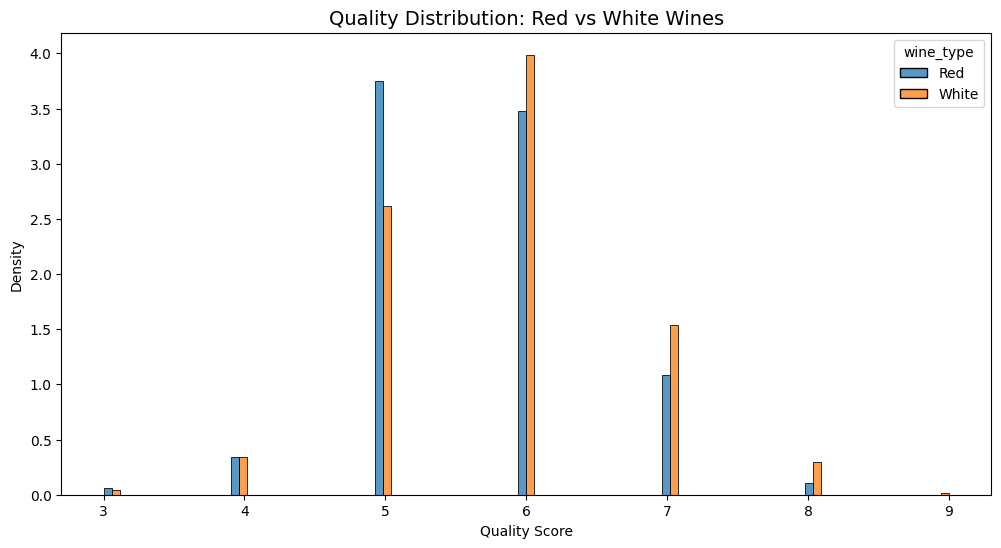

In [145]:
# 2. Quality Distribution
plt.figure(figsize=(12, 6))
plt.title('Quality Distribution: Red vs White Wines', 
          fontsize=14)

# Plotting histogram    
sns.histplot(data=combinedWine, x='quality', 
             hue='wine_type', multiple="dodge", 
                stat='density', common_norm=False)
plt.xlabel('Quality Score')
plt.ylabel('Density')
plt.show()

### Inferences from the histogram of Quality scores

**Quality Scores 5-6**<br> 
There is a significant overlap in the distribution of red and white wines in this range. This suggests that a considerable number of both red and white wines fall within this quality category.<br>
<br>

**Quality Scores 3-4**<br> 
White wines have a higher density in this range, indicating a larger proportion of lower-quality white wines compared to red wines.<br>
<br>

**Quality Scores 7-9**<br> 
Red wines have a higher density in this range, indicating a larger proportion of higher-quality red wines compared to white wines.

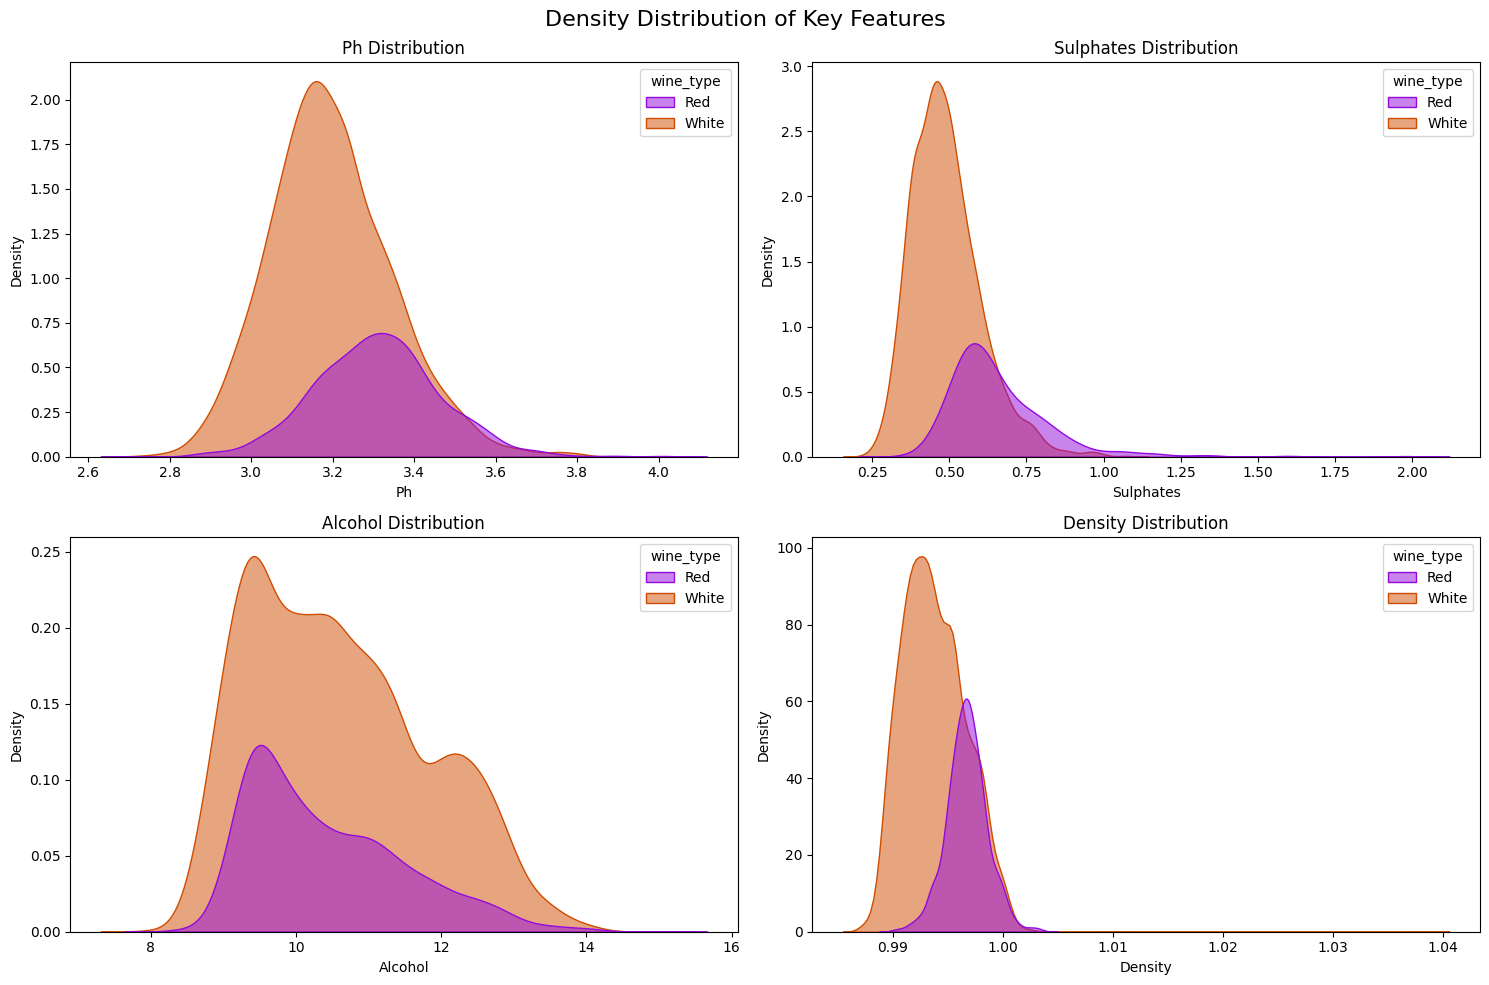

In [146]:
# Density plots for key features
plt.figure(figsize=(15, 10))
plt.suptitle('Density Distribution of Key Features', fontsize=16)
    
features = ['pH', 'sulphates', 'alcohol', 'density']
    
for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)
        sns.kdeplot(data=combinedWine, x=feature, hue='wine_type',
                    palette="gnuplot", fill=True, alpha=0.5)
        plt.title(f'{feature.title()} Distribution')
        plt.xlabel(f'{feature.title()}')
        
plt.tight_layout()
plt.show()

### Inferences from the density plot of the key feautres of Red and White wines

**pH Distribution**<br>
Red wines tend to have a slightly higher pH compared to white wines.
Both types exhibit a similar range of pH values, but the distribution for red wines is slightly shifted to the right.<br>
<br>

**Sulphates Distribution**<br>
Red wines generally have higher sulphate levels than white wines.
Both types have a similar range of values, but the distribution for red wines is shifted to the right.<br>
<br>

**Alcohol Distribution**<br>
Red wines tend to have higher alcohol content compared to white wines.
Both types have a similar range of values, but the distribution for red wines is shifted to the right.<br>
<br>

**Density Distribution**<br>
The density distributions of red and white wines are almost identical. This suggests that there is no significant difference in the overall density between the two wine types.<br>

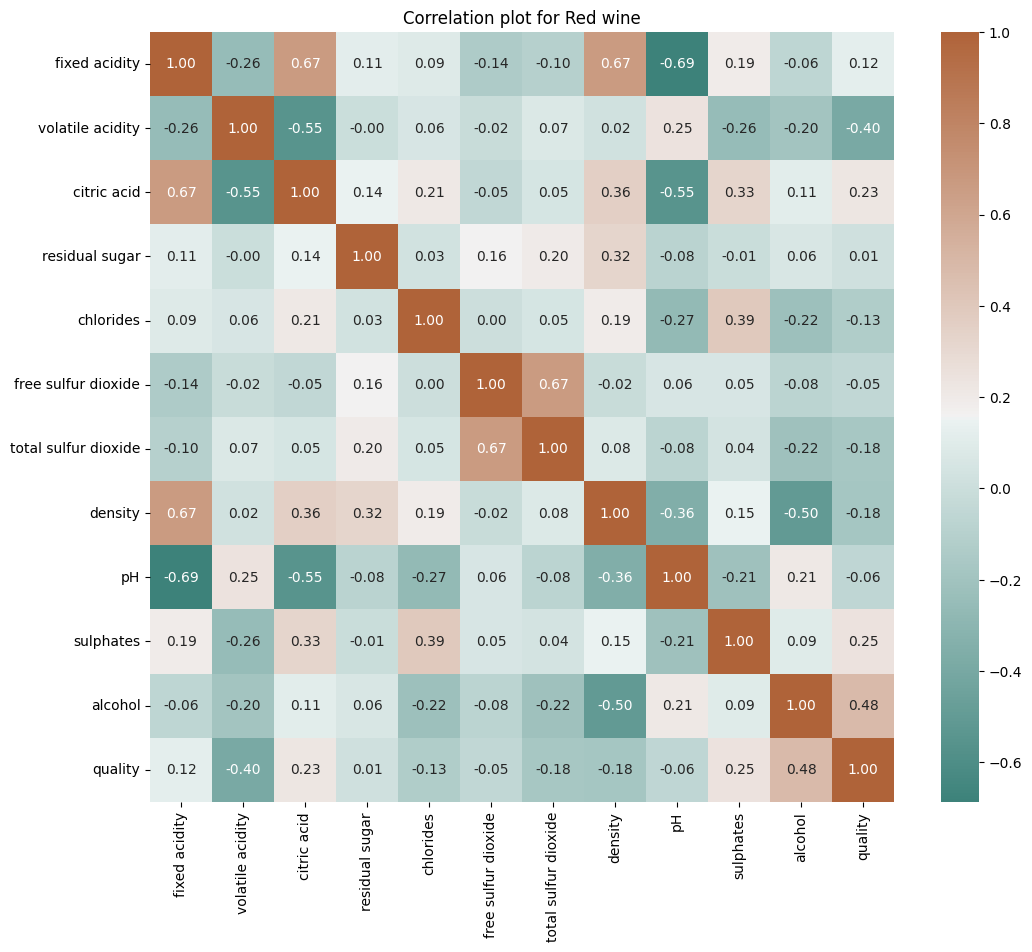

In [147]:
# Correlation plot for Red wine
correlationMatrixRed = redWine.corr(numeric_only=True)

plt.figure(figsize = (12,10))
sns.heatmap(correlationMatrixRed, annot = True,
             cmap = sns.diverging_palette(180, 30,
             as_cmap=True), fmt = ".2f")
plt.title("Correlation plot for Red wine")
plt.show()

### Inferences fromt the correlation plot of Red wine

**1. Strong Positive Correlations**<br>
*Density and Alcohol Content:* There is a strong positive correlation between density and alcohol content. This is expected as higher alcohol content increases the density of the wine.<br>
<br>

**2. Strong Negative Correlations**<br>
*Volatile Acidity and Citric Acid:* A strong negative correlation exists between volatile acidity and citric acid. This suggests that wines with higher levels of citric acid tend to have lower levels of volatile acidity.
Density and pH: Density and pH have a strong negative correlation. This indicates that as the pH increases, the density tends to decrease.<br>
<br>

**3. Moderate Positive Correlations**<br>
*Sulphates and Alcohol:* There is a moderate positive correlation between sulphates and alcohol content. This suggests that wines with higher alcohol content tend to have higher sulphate levels.
Citric Acid and Quality: A moderate positive correlation exists between citric acid and quality. This indicates that wines with higher levels of citric acid are often perceived as higher quality.<br>
<br>

**4. Weak or No Correlations**<br>
Several variables, such as free sulfur dioxide and total sulfur dioxide, show weak or no correlations with other variables. This suggests that these variables may not have a significant impact on the overall quality or other characteristics of the wine.

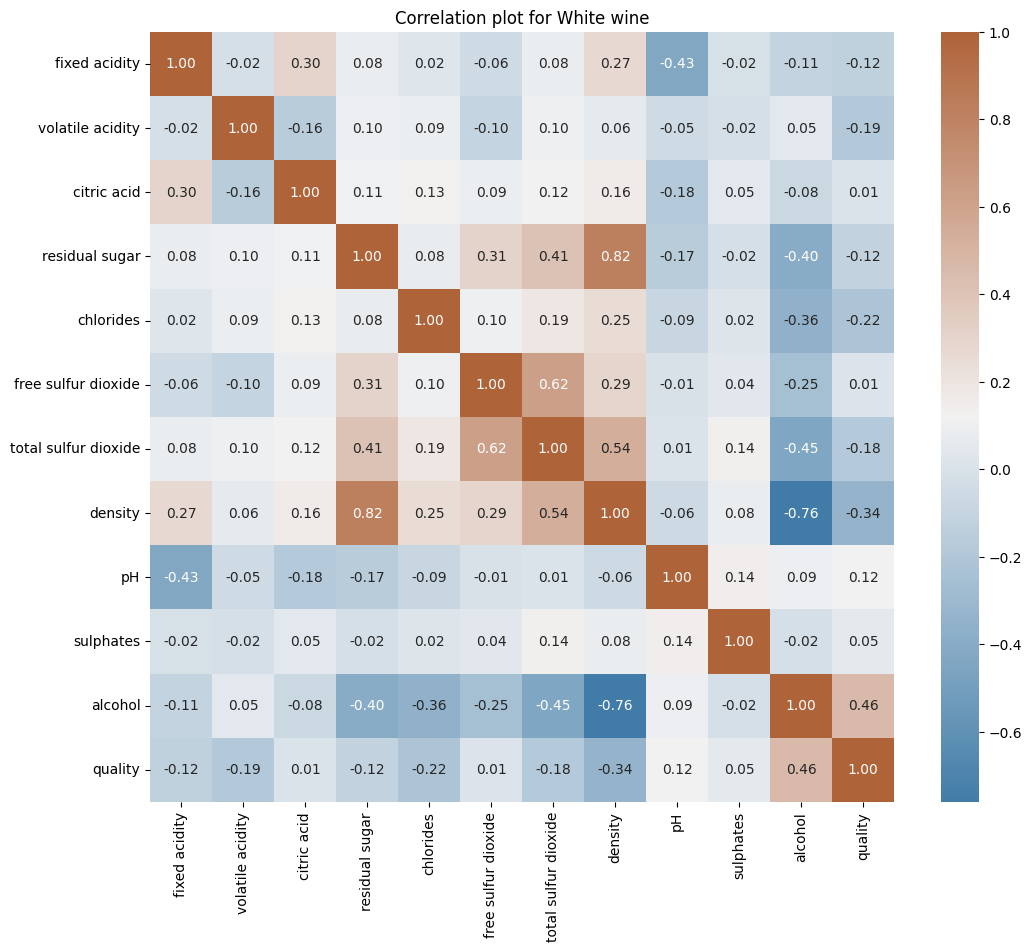

In [148]:
# Correlation plot for White wine
correlationMatrixWhite = whiteWine.corr(numeric_only=True)

plt.figure(figsize = (12,10))
sns.heatmap(correlationMatrixWhite, annot = True, 
            cmap = sns.diverging_palette(240, 30, 
            as_cmap=True), fmt = ".2f")
plt.title("Correlation plot for White wine")
plt.show()

### Inferences from the correlation plot if White wine

**1. Strong Positive Correlations**<br>
*Density and Alcohol Content:* Similar to red wine, there is a strong positive correlation between density and alcohol content. This indicates that wines with higher alcohol content tend to have higher density.<br>
<br>

**Strong Negative Correlations**<br>
*Volatile Acidity and Quality:* A strong negative correlation exists between volatile acidity and quality. This suggests that wines with lower volatile acidity are generally perceived as higher quality.<br>
*Density and pH:* There is a strong negative correlation between density and pH, indicating that as the pH increases, the density tends to decrease.<br>
<br>

**Moderate Positive Correlations**<br>
Residual Sugar, Density, and Alcohol Content: There are moderate positive correlations between residual sugar, density, and alcohol content. This suggests that wines with higher residual sugar tend to have higher density and alcohol content.<br>
<br>

**Moderate Negative Correlations**<br>
*Volatile Acidity and Citric Acid:* A moderate negative correlation exists between volatile acidity and citric acid, similar to red wine.<br>
*Density and pH:* There is a moderate negative correlation between density and pH.<br>
<br>

**Weak or No Correlations**<br>
Several variables, such as free sulfur dioxide and total sulfur dioxide, show weak or no correlations with other variables. This suggests that these variables may not have a significant impact on the overall quality or other characteristics of the wine.



Overall, the correlation plot for white wine reveals similar patterns to red wine, with some distinct differences:<br>

*Volatile Acidity and Quality:* The strong negative correlation between volatile acidity and quality is more pronounced in white wine compared to red wine.<br>
<br>

*Residual Sugar:* Residual sugar has a stronger positive correlation with density and alcohol content in white wine.

<div style="page-break-after: always;"></div>

# Question 3

## (a) Combine the two datasets into a single DataFrame.

In [149]:
combinedWine.shape

(5320, 13)

In [150]:
combinedWine.duplicated().sum()

0

The data from both the dataframes were already combined to make graphical comparisons in [Q2 (d)](#2d)

## (b) Compute the Pearson correlation coefficient between each of the measurements and identify which indicators are most correlated. List the four most strongly correlated pairs.
<a id="3b"></a>

In [152]:
# Initialize a list to store correlation results
correlation_results = []

# Calculate Pearson correlation coefficients for each pair of measurements
# Exclude 'wine_type' column
columns = combinedWine.columns[:-1]  
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        var1 = columns[i]
        var2 = columns[j]
        corr_coefficient, _ = stats.pearsonr(combinedWine[var1], 
                                             combinedWine[var2])
        correlation_results.append((var1, var2, corr_coefficient))

# Convert results to DataFrame for easier manipulation
correlationTable = pd.DataFrame(correlation_results,
                columns=['Variable 1', 'Variable 2', 'Correlation Coefficient'])

print(correlationTable)

# Sort by absolute correlation and get the top four pairs
correlationTable['Abs Correlation'] = correlationTable['Correlation Coefficient'].abs()
topCorrelations = correlationTable.sort_values(by='Abs Correlation', 
                                               ascending=False).head(4)

# Display the results
print("\n\nTop Four Strongly Correlated Pairs:")
print(topCorrelations[['Variable 1', 'Variable 2', 'Correlation Coefficient']])

       Variable 1           Variable 2  Correlation Coefficient
0   fixed acidity     volatile acidity                 0.214752
1   fixed acidity          citric acid                 0.330328
2   fixed acidity       residual sugar                -0.104439
3   fixed acidity            chlorides                 0.288918
4   fixed acidity  free sulfur dioxide                -0.281590
..            ...                  ...                      ...
61             pH              alcohol                 0.097314
62             pH              quality                 0.039733
63      sulphates              alcohol                -0.017232
64      sulphates              quality                 0.041884
65        alcohol              quality                 0.469422

[66 rows x 3 columns]


Top Four Strongly Correlated Pairs:
             Variable 1            Variable 2  Correlation Coefficient
45  free sulfur dioxide  total sulfur dioxide                 0.720488
58              density      

## (c) Create scatter plots for the each of the correlated pairs identified in [Q3(b)](#3b). Are the relationships as expected from the correlation coefficients?

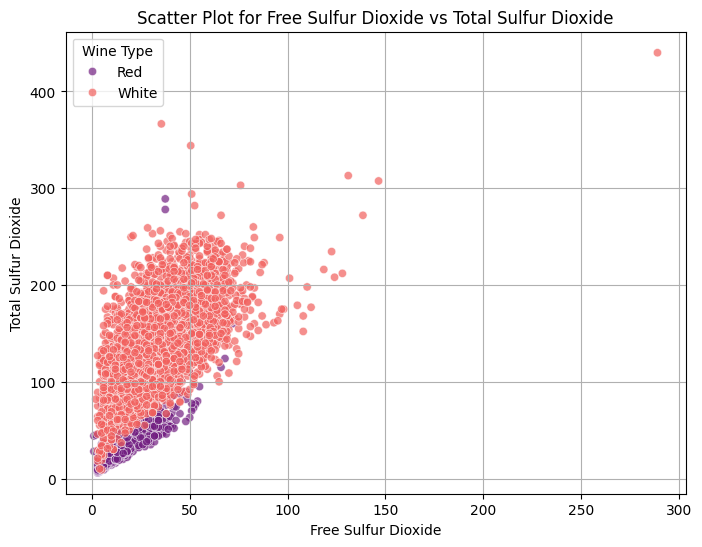

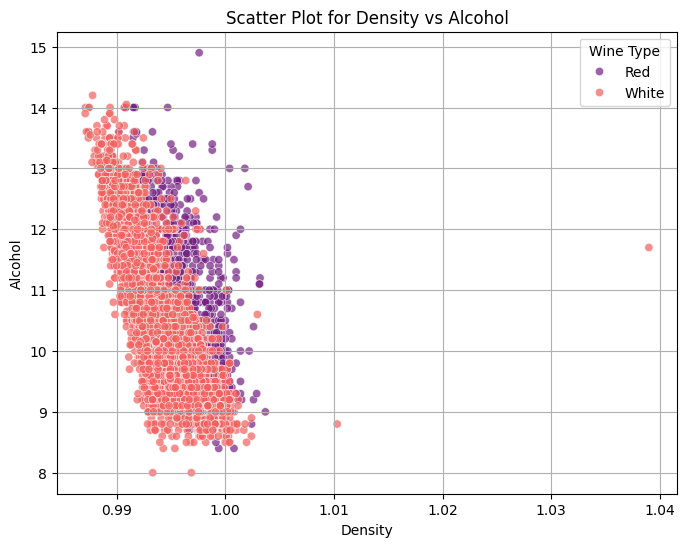

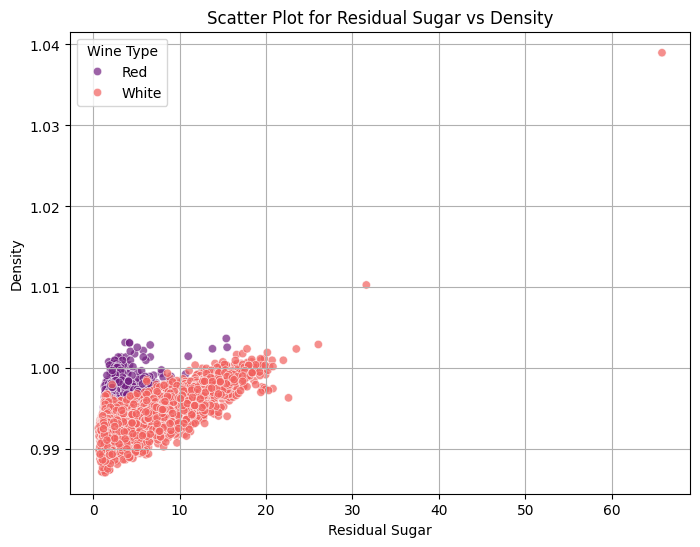

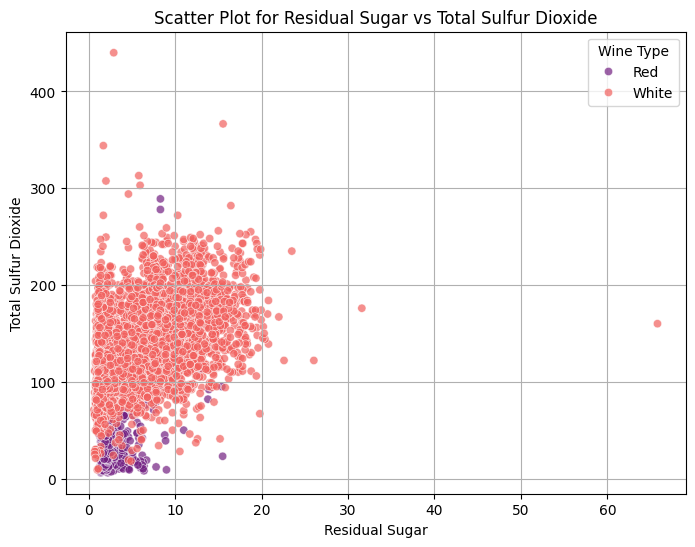

In [153]:
# Create scatter plots for each of the top correlated pairs
for idx, row in topCorrelations.iterrows():
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=combinedWine,
                    x=combinedWine[var1], 
                    y=combinedWine[var2], 
                    hue='wine_type',
                    palette='magma', 
                    alpha=0.7)
    plt.title(f'Scatter Plot for {var1.title()} vs {var2.title()}')
    plt.xlabel(var1.title())
    plt.ylabel(var2.title())
    plt.legend(title="Wine Type")
    plt.grid()
    plt.show()

We see the relationships in all graphs as expected from the correlations we got except fot the Residual Sugar vs Total Sulfur Dioxide.

For the scatter plot of Residual Sugar vs Total Sulfur Dioxide, the relationship is not as clear-cut as the previous examples. Here's what I can observe:

**Overall Trend**<br>
There appears to be a weak positive correlation between residual sugar and total sulfur dioxide. This means that as the residual sugar content increases, the total sulfur dioxide content tends to increase slightly. However, the relationship is not very strong.<br>
<br>

**Specific Observations**<br>
*Red Wine:* For red wines, the relationship is less clear, with data points scattered across a wider range. There seems to be a slight positive trend, but it's not very pronounced.
*White Wine:* For white wines, the relationship is more apparent. There's a slightly stronger positive trend, with data points clustering around a line with a positive slope.

<div style="page-break-after: always;"></div>

# Question 4 - Linear regression to predict wine quality.

## (a) We consider wine with a quality score from 0 to 5 as being POOR, while quality scores from 6-10 are considered GOOD. Create a new column in the dataframe indicating whether the wine is POOR or GOOD.

In [154]:
# Create a new column 'quality_class' based on the quality score
combinedWine['quality_class'] = combinedWine['quality'].apply(lambda x: 'POOR' if x <= 5 else 'GOOD')

# Display the updated DataFrame with the new column
print(combinedWine[['quality', 'quality_class']].head(10))

    quality quality_class
0         5          POOR
1         5          POOR
2         5          POOR
3         6          GOOD
5         5          POOR
6         5          POOR
7         7          GOOD
8         7          GOOD
9         5          POOR
10        5          POOR


I applied a lambda function to create a new column and segregate the wine quality as good or poor based on the quality score.

## (b) Separate the data into response and predictor variables and standardise the predictor variables.

In [155]:
# Separating the data into response and predictor variables
predictorVar = combinedWine.drop(columns=['quality',
                            'quality_class', 'wine_type'])
responseVar = combinedWine['quality']

#standardizing the predictor variable
predictorVarStndrd = (predictorVar - predictorVar.mean())/predictorVar.std()

print(predictorVarStndrd.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.140051          2.115150    -2.164312       -0.699634   0.523831   
1       0.443157          3.184998    -2.164312       -0.544084   1.120630   
2       0.443157          2.471766    -1.892494       -0.610748   0.957867   
3       3.019557         -0.381161     1.641139       -0.699634   0.496704   
5       0.140051          1.877406    -2.164312       -0.721855   0.496704   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.069172             -1.411010  1.100892  1.779136   0.177924   
1            -0.282878             -0.829761  0.763681 -0.153783   0.979297   
2            -0.844517             -1.058738  0.831124  0.220331   0.778954   
3            -0.732189             -0.953056  1.168334 -0.403192   0.311486   
5            -0.956844             -1.305329  1.100892  1.779136   0.177924   

    alcohol  
0 -0.969061  
1 -0.631774  
2 -0.631774  


## (c) Fit a linear regression model and interpret the fitted model.

In [156]:
# Adding intercept column so that we can do regression
predictorVarStndrdWithConst = sm.add_constant(predictorVarStndrd)

# Running linear regression and fitting the model
linReg = sm.OLS(responseVar, predictorVarStndrdWithConst)
resLinReg = linReg.fit()
print(resLinReg.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     214.3
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:41:29   Log-Likelihood:                -5889.3
No. Observations:                5320   AIC:                         1.180e+04
Df Residuals:                    5308   BIC:                         1.188e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.7957 

### Model interpretation

**R-squared : 0.308**<br>
This indicates that 29.2% of the variance in wine quality is explained by the model. While this is a moderate value, it suggests other factors not included in the model might also affect quality.<br>
<br>

**Adjusted R-squared: 0.306**<br>
Adjusted for the number of predictors, indicating minimal overfitting.<br>
<br>

**F-statistic:** <br>
The F-statistic is 214.3 with a p-value of 0.00, indicating that the overall regression model is statistically significant. This means that at least one of the predictors significantly contributes to explaining the variance in wine quality.<br>
<br>

**Coefficients**<br>
*Positive Impact:* Fixed acidity (0.082), residual sugar (0.169), free sulfur dioxide (0.122), pH (0.091), sulfates (0.118), and alcohol (0.319) all positively influence wine quality.<br>
*Negative Impact:* Volatile acidity (-0.201), total sulfur dioxide (-0.144), and density (-0.167) negatively affect quality, while citric acid and chlorides show no significant impact.<br>
<br>

Most predictors (fixed acidity, volatile acidity, residual sugar, free sulfur dioxide, total sulfur dioxide, density, pH, sulfates, and alcohol) have p-values less than 0.05, indicating they are statistically significant contributors to explaining wine quality, except for citric acid and chlorides.

## (d) Perform forward selection for your regression model using the Akaike Information Criterion (AIC). Examine the selected model and discuss your findings in relation to the model fitted in part (b).

In [157]:
# Forward selection based on AIC 
# PS: did some changes to week 9 assessed question
def forwardAIC(X, y):
    initialFeatures = X.columns.tolist()
    bestAic = float('inf')
    bestModel = None
    selectedFeatures = []

    while initialFeatures:
        aicValues = []
        for feature in initialFeatures:
            modelFeatures = selectedFeatures + [feature]
            model = sm.OLS(y, X[modelFeatures]).fit()
            aicValues.append((model.aic, feature))

        # Find the feature with the lowest AIC
        aicValues.sort()
        bestAicValue, bestFeature = aicValues[0]

        # If the best AIC is better than current best, update the model
        if bestAicValue < bestAic:
            bestAic = bestAicValue
            selectedFeatures.append(bestFeature)
            initialFeatures.remove(bestFeature)
            bestModel = sm.OLS(y, X[selectedFeatures]).fit()
        else:
            # Stop if no improvement
            break  

    return selectedFeatures, bestModel

# Perform forward selection
selectedFeatures, finalModel = forwardAIC(pd.DataFrame(predictorVarStndrdWithConst),
                                           responseVar)

# Print results
print("Selected Features:", selectedFeatures)
print("\n\nSelected Model: ")
print(finalModel.summary())

Selected Features: ['const', 'alcohol', 'volatile acidity', 'sulphates', 'free sulfur dioxide', 'total sulfur dioxide', 'residual sugar', 'pH', 'chlorides', 'density', 'fixed acidity']


Selected Model: 
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     235.6
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:41:29   Log-Likelihood:                -5889.8
No. Observations:                5320   AIC:                         1.180e+04
Df Residuals:                    5309   BIC:                         1.187e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
      

**R-squared:** <br>
The R-squared value remains at 0.307, indicating that approximately 30.7% of the variance in wine quality is explained by the selected features. This value is consistent with the previous model, suggesting that the same variables are contributing similarly to the explanation of quality.<br>
<br>

**F-statistic:** <br>
The F-statistic has slightly increased to 235.6, with a p-value of 0.00, indicating that the model is statistically significant and that at least one predictor variable is significantly related to wine quality.

The selected model includes similar features as those in part (c), maintaining consistency in key predictors such as alcohol, volatile acidity, residual sugar, and others:
The coefficients for most variables are consistent in direction and significance compared to the previous model.
The slight changes in coefficients indicate that the relationships remain stable across both models, reinforcing the robustness of these predictors in explaining wine quality.

<div style="page-break-after: always;"></div>

# Question 5

## Random forest regression to predict the quality of a wine.

## (a) Split the data into appropriate training and test sets.

In [158]:

X = predictorVar
y = responseVar

# Splitting data into test data and training data by 30% - 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

I split the training data and test data using `train_test_split()` and kept test data size 30%

## (b) Fit a random forest regression model with 10 trees using the training data. Include the argument random_state=101 in the random forest regression function to ensure reproducible results. Determine which variables are most important in predicting the quality of a wine. Discuss your findings in relation to the linear model’s fit in question 4.

In [159]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Random Forest Regression
rfModel = RandomForestRegressor(n_estimators=10, random_state=101)
rfModel.fit(X_train_scaled, y_train)
    
# Predict and evaluate
trainScore = rfModel.score(X_train_scaled, y_train)
testScore = rfModel.score(X_test_scaled, y_test)

# Feature importance
featureImportance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rfModel.feature_importances_
    }).sort_values('Importance', ascending=False)


# Print results
print("\nModel Performance:")
print(f"Training R² Score: {trainScore:.4f}")
print(f"Testing R² Score: {testScore :.4f}")

print("\nFeature Importance:")
print(featureImportance)


Model Performance:
Training R² Score: 0.8749
Testing R² Score: 0.2882

Feature Importance:
                 Feature  Importance
10               alcohol    0.255033
1       volatile acidity    0.129587
5    free sulfur dioxide    0.087738
6   total sulfur dioxide    0.079387
9              sulphates    0.075951
3         residual sugar    0.073263
8                     pH    0.066003
4              chlorides    0.063264
0          fixed acidity    0.058335
7                density    0.057213
2            citric acid    0.054227


The performance metrics for the Random Forest regression model indicate a strong training performance but a significantly lower testing performance:<br>

**Training $R^2$ Score: 0.8749**<br>
This high $R^2$ score suggests that the model fits the training data very well, capturing most of the variance in wine quality based on the selected features.<br>
<br>

**Testing $R^2$ Score: 0.2882**<br>
The much lower testing $R^2$ score indicates that the model does not generalize well to unseen data, suggesting potential overfitting. The model performs well on training data but struggles to predict quality accurately on new data.

#### Comparinson from Linear model

**Consistency in Important Features:**<br>
The Random Forest model identifies many of the same key predictors as significant in the linear regression model, particularly alcohol, volatile acidity, and free sulfur dioxide.<br>
Both models agree that higher alcohol content and lower volatile acidity are associated with higher wine quality.<br>
<br>

**Model Performance Discrepancy:**
The significant drop in $R^2$ from training (0.8749) to testing (0.2882) in the Random Forest model suggests overfitting; it captures noise in the training data rather than generalizable patterns.
In contrast, the linear regression model maintains a more stable performance across datasets ($R^2$ = 0.2882), indicating better generalization despite its simpler structure.

## (c) Use the random forest regression model to predict the quality of a wine for the test set. Create a scatter plot of the true quality versus the predicted one. Interpret your plot.

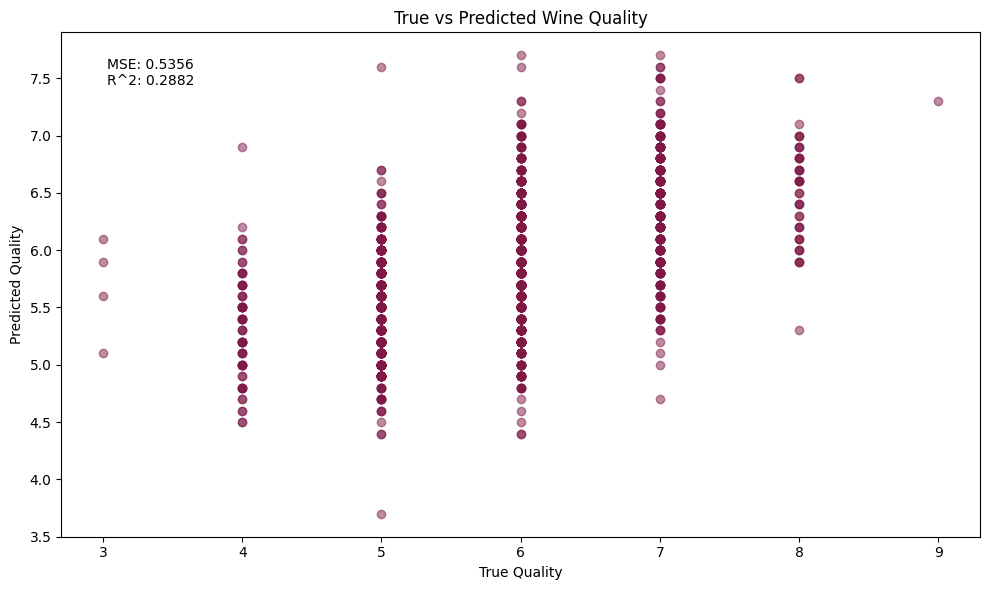

In [160]:
# Predict using the above model
y_pred = rfModel.predict(X_test_scaled)
    
# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#7E1946', alpha=0.5)
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('True vs Predicted Wine Quality')
    
# Annotate plot with performance metrics
plt.annotate(f'MSE: {mse:.4f}\nR^2: {r2:.4f}', 
            xy=(0.05, 0.95), xycoords='axes fraction', 
            verticalalignment='top')
    
plt.tight_layout()

### Key obseravtions from the plot above

The plot shows a generally positive correlation between the true quality and the predicted quality, indicating that the model is able to capture some of the underlying relationships in the data.<br>
However, the scatter is quite dispersed, with many data points deviating from the ideal 1:1 line, where the predicted quality would perfectly match the true quality.<br>
The R-squared value of 0.2882 and the mean squared error of 0.5356 suggest that the model has moderate predictive power, but there is still room for improvement.<br>
Some of the data points with higher true quality (around 7-8) seem to be consistently underpredicted by the model, while some of the lower quality wines (around 5-6) are overpredicted.<br>
<br>
Overall, the scatter plot indicates that the random forest regression model is able to capture some of the patterns in the wine quality data, but it also suggests that the model has limitations in accurately predicting the exact quality scores, especially for the wines at the higher and lower ends of the quality spectrum.

## (d) Assess the performance of a random forest regression model with 5, 10, 50, 100, 500, 1000, and 5000 trees in predicting the quality of a wine. You should repeat the model fit and prediction 20 times for each number of trees, using a different random state for each repeat. Create a plot of the model performance as a function of the number of trees (use a log axis for the number of trees). The plot should show the mean and standard error of the performance metric for each number of trees. Discuss your findings.

MSE Results:
Trees: 5, Mean MSE: 0.5886 ± 0.0000
Trees: 10, Mean MSE: 0.5356 ± 0.0000
Trees: 50, Mean MSE: 0.4813 ± 0.0000
Trees: 100, Mean MSE: 0.4746 ± 0.0000
Trees: 500, Mean MSE: 0.4730 ± 0.0000
Trees: 1000, Mean MSE: 0.4724 ± 0.0000
Trees: 5000, Mean MSE: 0.4725 ± 0.0000

R² Results:
Trees: 5, Mean R²: 0.2178 ± 0.0000
Trees: 10, Mean R²: 0.2882 ± 0.0000
Trees: 50, Mean R²: 0.3603 ± 0.0000
Trees: 100, Mean R²: 0.3692 ± 0.0000
Trees: 500, Mean R²: 0.3714 ± 0.0000
Trees: 1000, Mean R²: 0.3723 ± 0.0000
Trees: 5000, Mean R²: 0.3721 ± 0.0000


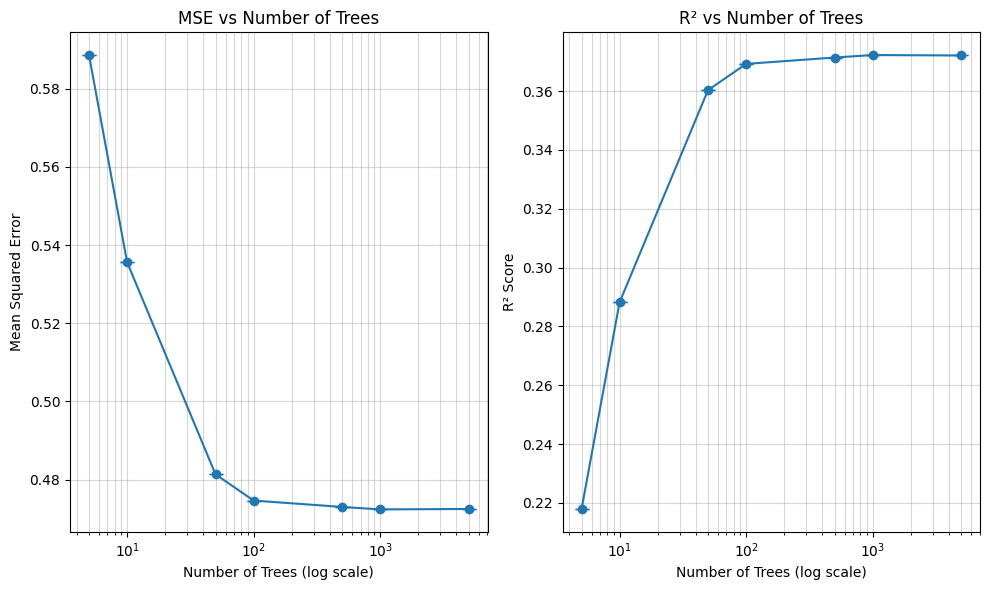

In [161]:
# Tree counts to test
treeCounts = [5, 10, 50, 100, 500, 1000, 5000]
# Number of times to be repeatedly tested
repeats=20

# Performance tracking
mse_results = []
r2_results = []

# Repeated model evaluation
for n_trees in treeCounts:
    mse_runs = []
    r2_runs = []
    
    for _ in range(repeats):
        # Train Random Forest
        rf = RandomForestRegressor(
            n_estimators=n_trees, 
            random_state=101,
            n_jobs=-1
        )
        rf.fit(X_train_scaled, y_train)
        
        # Predict and evaluate
        y_pred = rf.predict(X_test_scaled)
        mse_runs.append(mean_squared_error(y_test, y_pred))
        r2_runs.append(r2_score(y_test, y_pred))
    
    # Store aggregated results
    mse_results.append({
        'n_trees': n_trees,
        'mean': np.mean(mse_runs),
        'std_error': np.std(mse_runs) / np.sqrt(repeats)
    })
    r2_results.append({
        'n_trees': n_trees,
        'mean': np.mean(r2_runs),
        'std_error': np.std(r2_runs) / np.sqrt(repeats)
    })

# Plotting
plt.figure(figsize=(10, 6))

# MSE Plot
plt.subplot(1, 2, 1)
mse_df = pd.DataFrame(mse_results)
plt.errorbar(mse_df['n_trees'], mse_df['mean'], 
             yerr=mse_df['std_error'], 
             fmt='o-', capsize=5)
plt.xscale('log')
plt.title('MSE vs Number of Trees')
plt.xlabel('Number of Trees (log scale)')
plt.ylabel('Mean Squared Error')
plt.grid(True, which="both", ls="-", alpha=0.5)

# R2 Plot
plt.subplot(1, 2, 2)
r2_df = pd.DataFrame(r2_results)
plt.errorbar(r2_df['n_trees'], r2_df['mean'], 
             yerr=r2_df['std_error'], 
             fmt='o-', capsize=5)
plt.xscale('log')
plt.title('R² vs Number of Trees')
plt.xlabel('Number of Trees (log scale)')
plt.ylabel('R² Score')
plt.grid(True, which="both", ls="-", alpha=0.5)

plt.tight_layout()

# Print detailed results
print("MSE Results:")
for result in mse_results:
    print(f"Trees: {result['n_trees']}, Mean MSE: {result['mean']:.4f} ± {result['std_error']:.4f}")

print("\nR² Results:")
for result in r2_results:
    print(f"Trees: {result['n_trees']}, Mean R²: {result['mean']:.4f} ± {result['std_error']:.4f}")

### Findings from the above results

**1. Mean Squared Error (MSE)**<br>
*MSE Trend:*<br>
As the number of trees increases, the MSE decreases consistently.
The largest drop occurs between 5 and 50 trees, after which the improvement becomes more gradual, indicating diminishing returns.<br>
<br>
*Key Points:*<br>
5 Trees: MSE = 0.5886<br>
100 Trees: MSE = 0.4746<br>
5000 Trees: MSE = 0.4725 (minimal improvement over 500 trees).<br>
<br>
Adding more trees improves the model’s predictions (lower error), but beyond 500 trees, the performance gain is minimal. A trade-off between computation cost and improvement should guide the choice of the number of trees.<br>
<br>
**2. $R^2$ Score**<br>
*$R^2$ Trend:*<br>
The $R^2$ score increases with more trees, plateauing beyond 500 trees.<br>
The most significant improvement occurs between 5 and 50 trees, similar to the MSE trend.<br>

*Key Points:*<br>
5 Trees: $R^2$ = 0.2178 (poor fit).<br>
100 Trees: $R^2$ = 0.3692 (good fit).<br>
5000 Trees: $R^2$ = 0.3721 (minor improvement).<br>
<br>
The model's ability to explain variance in the target variable improves as the number of trees increases, but adding more trees beyond 500 has minimal benefit.

## (e) Explain the rationale for fitting the model multiple times with different random states.

Fitting a Random Forest regression model multiple times with different random states is a crucial practice in machine learning, particularly for the following reasons:<br>
<br>

**1. Ensuring Robustness and Stability**<br>
*Random Sampling:* Random Forests use bootstrapping (sampling with replacement) to create diverse subsets of the training data for each tree. By fitting the model with different random states, you ensure that the sampling process varies, which can lead to different tree structures and predictions. This variability helps assess how stable the model's performance is across different datasets.<br>

*Generalization:* Running the model multiple times allows you to evaluate its ability to generalize to unseen data. If the model performs consistently well across various random states, it indicates that it is not overly reliant on specific patterns in the training data.<br>
<br>

**2. Reducing Overfitting**<br>
*Diverse Decision Trees:* Each decision tree in a Random Forest is trained on a different subset of data, which helps mitigate overfitting. By using different random states, you create a more diverse set of trees, enhancing the model's ability to generalize rather than memorize the training data.<br>

*Error Averaging:* The final prediction in Random Forests is typically an average of predictions from all trees. By fitting the model multiple times, you can average out errors that may arise from specific trees influenced by particular data splits.<br>
<br>

**3. Hyperparameter Tuning**<br>
*Exploring Parameter Space:* When tuning hyperparameters (like the number of trees or maximum depth), using different random states can help determine how sensitive the model's performance is to these parameters across various configurations.<br>

*Cross-Validation:* Fitting models with different random states can be part of a cross-validation strategy, where each fold uses a different random state to ensure that every subset of data is evaluated, leading to more robust performance metrics.<br>

<div style="page-break-after: always;"></div>

# Question 6
## Clustering algorithms to identify different wine groups

## (a) Perform a k-means cluster analysis, using the indicators as the features. Run the clustering algorithm for different numbers of clusters (integers from 1 to 10). Plot the model performance as a function of the number of clusters and identify the optimal number of clusters for this data.

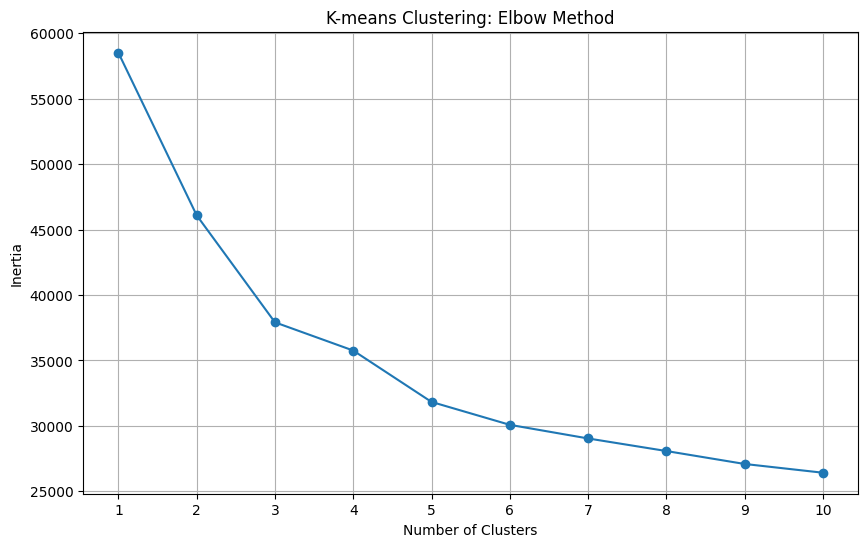

In [162]:
# Select features
features = predictorVar

# Standardizing the data
scaled_features = scaler.fit_transform(features)

# using elbow method hence getting inertias
inertia = []

#doing k means clustering for integers 1-10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=101)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('K-means Clustering: Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()

### Identifying Optimal Number of Clusters
The optimal number of clusters can be identified using the `Elbow Method`, which involves looking for a point where the inertia (within-cluster sum of squares) starts to decrease at a slower rate. This point typically indicates a suitable number of clusters.

We that here it is at **5** since after this number fo cluster the rate of decrease is slower.

## (b) Perform a k-means cluster analysis, using the optimal number of clusters (identified in part (a)), and identify the most discriminatory variables. (Hint: Create histograms for each variable, with the data separated by cluster.)

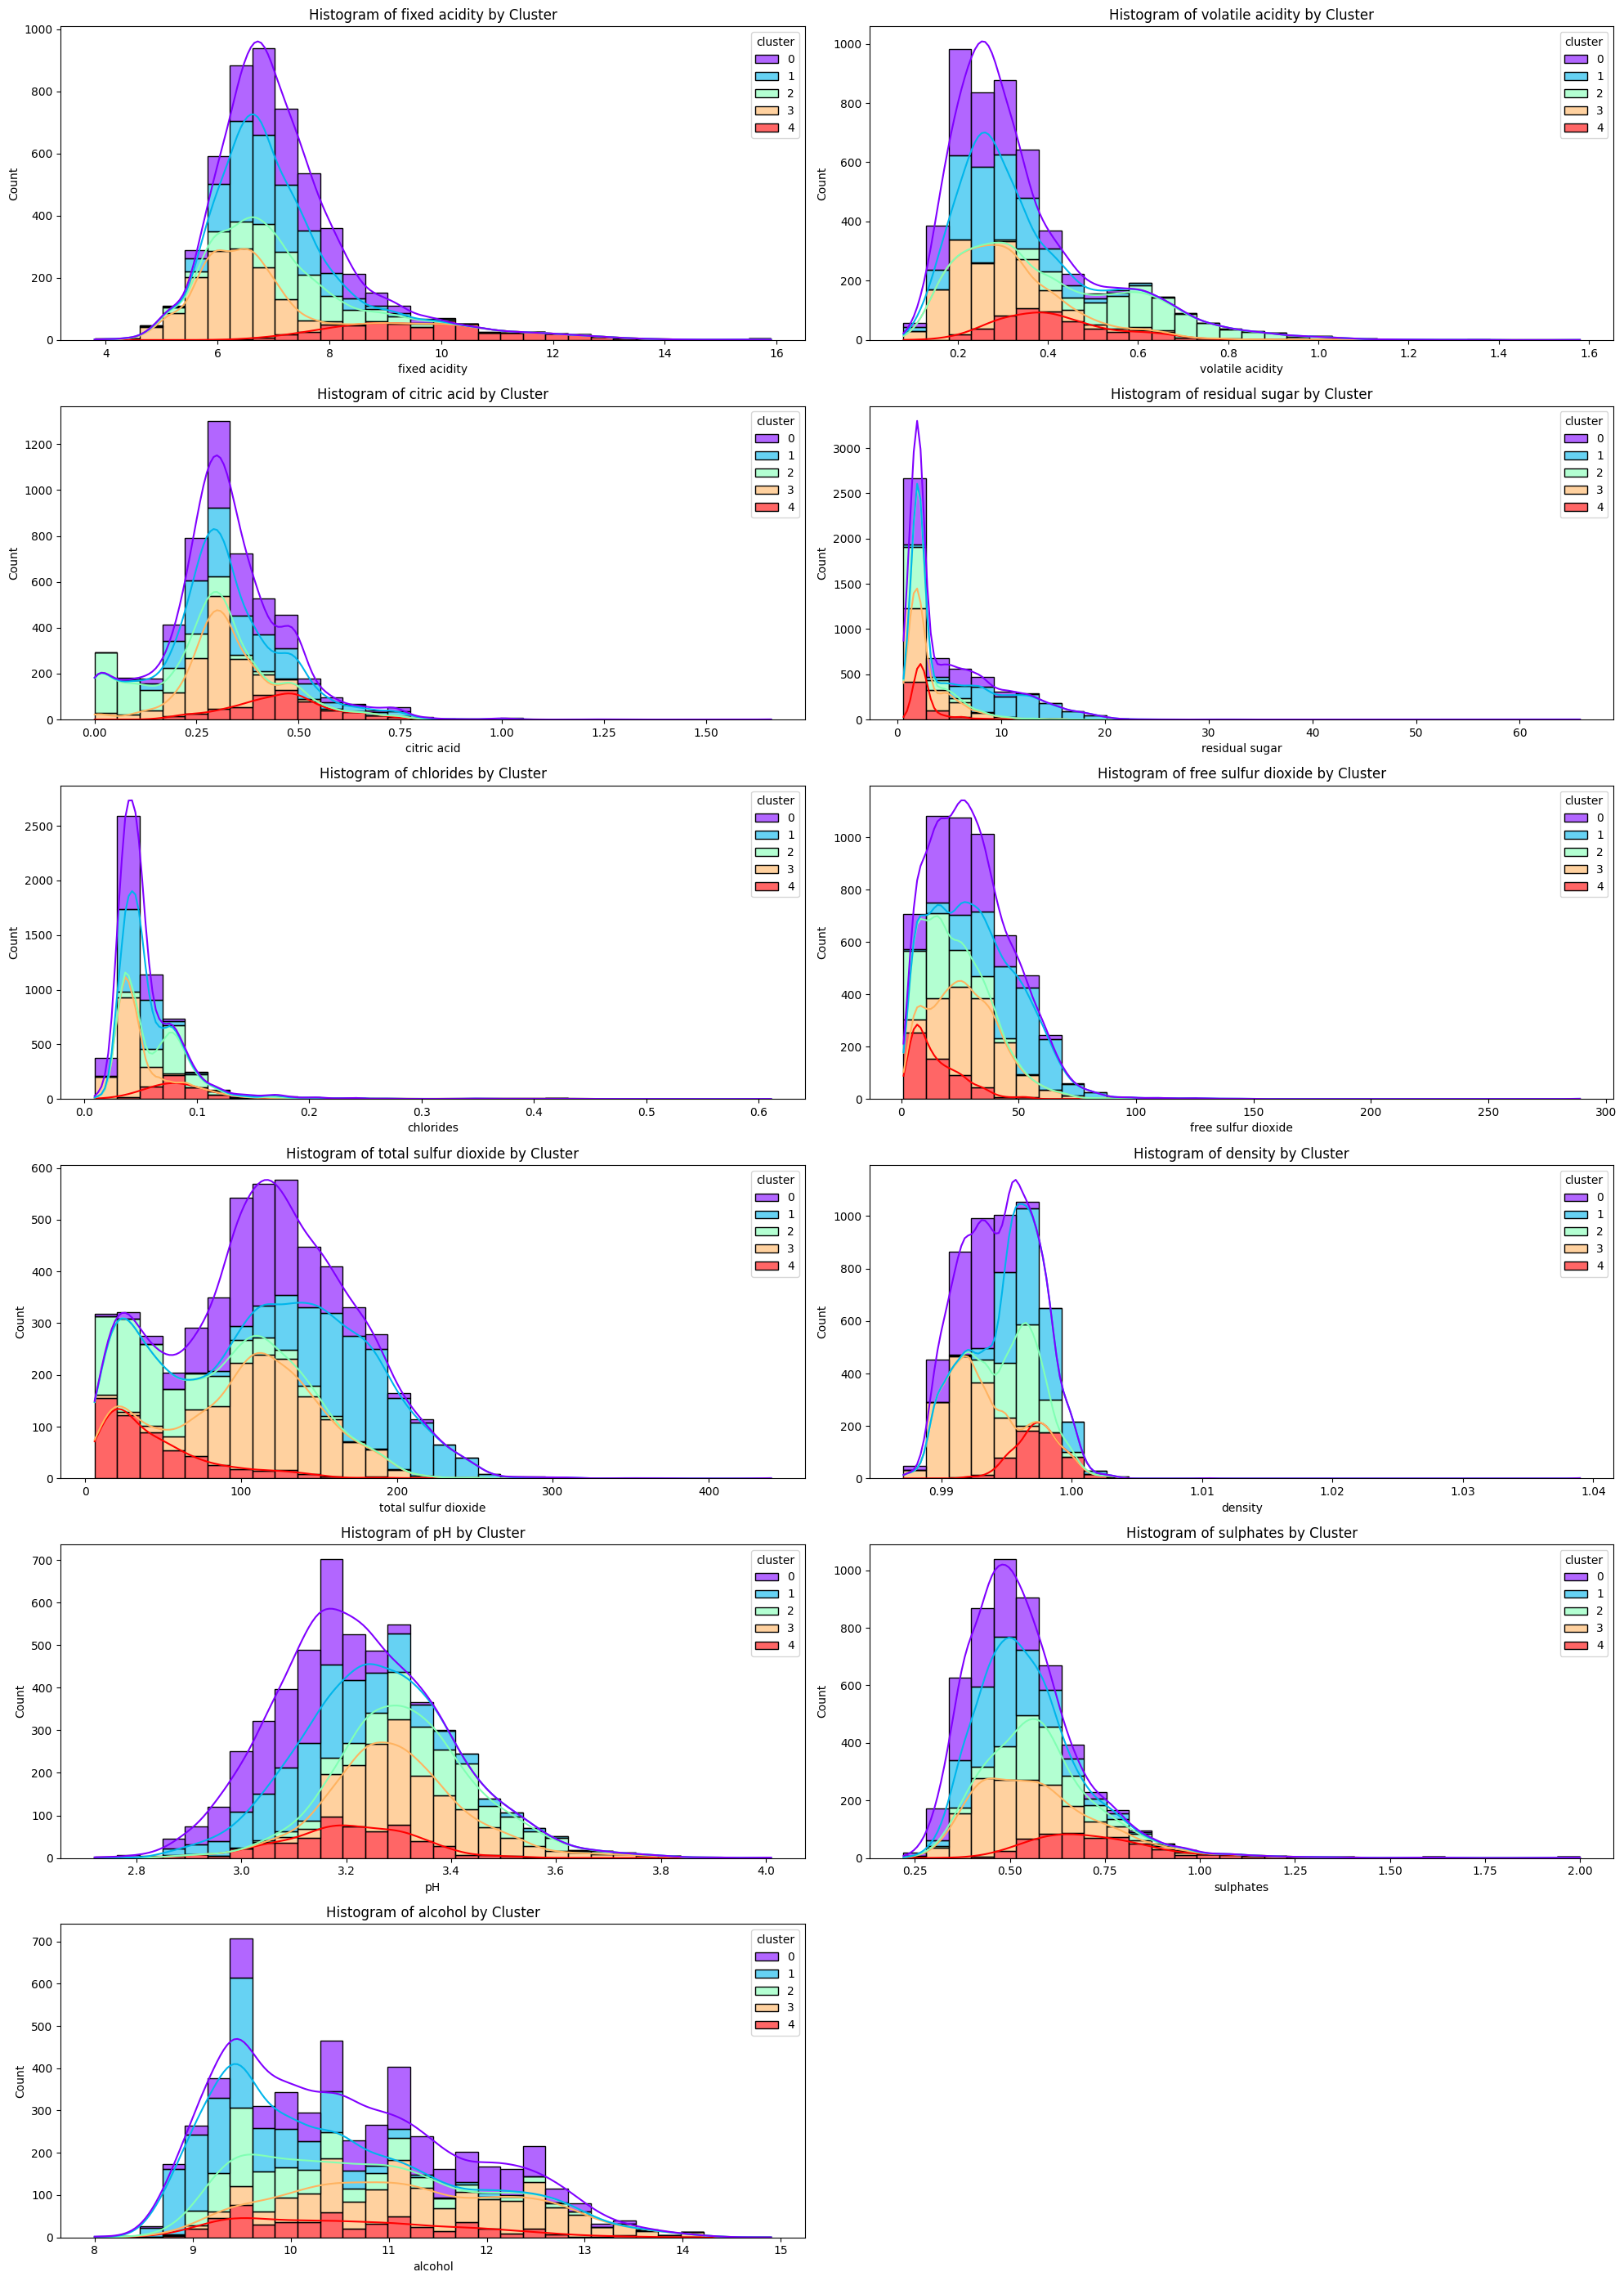

In [169]:
k = 5  # The optimal number found above
kmeans = KMeans(n_clusters=k, random_state=101)
combinedWine['cluster'] = kmeans.fit_predict(scaled_features)

# Set up the matplotlib figure
numVars = features.columns
numVarsCount = len(numVars)

plt.figure(figsize=(20, 28))

for i, var in enumerate(numVars):
    plt.subplot(6, 2, i+1) 
    sns.histplot(data=combinedWine, x=var, 
                 hue='cluster', multiple="stack",
                bins=30, palette="rainbow", 
                kde=True, alpha=0.6)
    plt.title(f'Histogram of {var} by Cluster')

plt.tight_layout()

From the histograms above we see that the most discriminatory features are:
1. Volatile Acidity
2. Citric Acid
3. Residual Sugar
4. Total Sulfur Dioxide
5. Alcohol

## (c) Create a series of scatter plots for the most discriminatory variables, colouring the points by cluster number. Discuss your findings.

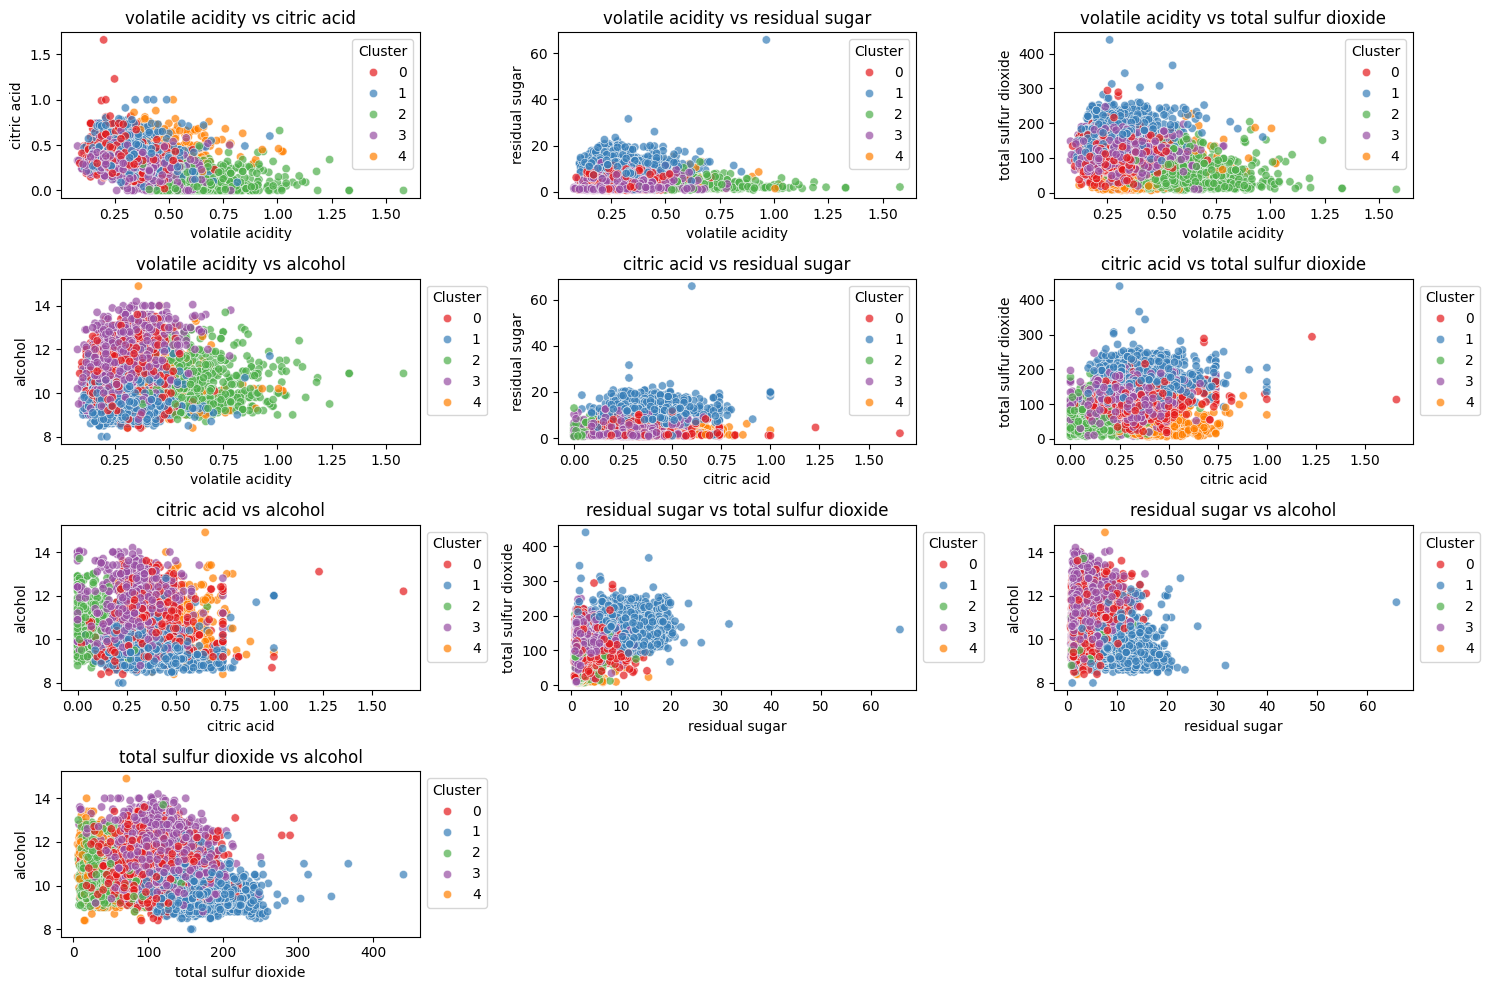

In [174]:
# Define the most discriminatory variables
discriminatory_vars = ['volatile acidity', 'citric acid',
                        'residual sugar', 
                        'total sulfur dioxide', 'alcohol']

# Generate scatter plots for variable pairs
plt.figure(figsize=(15, 10))

plot_idx = 1
for i in range(len(discriminatory_vars)):
    for j in range(i + 1, len(discriminatory_vars)):
        plt.subplot(4, 3, plot_idx)
        sns.scatterplot(
            data=combinedWine,
            x=discriminatory_vars[i],
            y=discriminatory_vars[j],
            hue='cluster',
            palette='Set1',
            alpha=0.7
        )
        plt.title(f'{discriminatory_vars[i]} vs {discriminatory_vars[j]}')
        plt.legend(title='Cluster', bbox_to_anchor=(1, 1))
        plot_idx += 1

plt.tight_layout()

From the above plots, several key insights can be drawn:

**Volatile Acidity vs Citric Acid:**<br>
The clusters show a clear negative correlation between volatile acidity and citric acid. Lower volatile acidity is often associated with higher citric acid levels, and vice versa. This suggests that wines with lower volatile acidity and higher citric acid tend to be clustered together.<br>
<br>

**Volatile Acidity vs Residual Sugar:**<br>
The clusters are well-separated, with cluster 0 having the lowest volatile acidity and residual sugar, and cluster 4 having the highest. There seems to be a slight negative correlation between volatile acidity and residual sugar.<br>
<br>

**Volatile Acidity vs Total Sulfur Dioxide:**<br>
There appears to be a weak positive correlation between volatile acidity and total sulfur dioxide. Again, the clusters are clearly differentiated, with cluster 0 having the lowest values for both properties, and cluster 4 the highest.<br>
<br>

**Volatile Acidity vs Alcohol:**<br>
There seems to be no proper clustering found in this as well as no trends can be infered.<br>
<br>

**Citric Acid vs Residual Sugar:**<br>
The clusters show a no correlation between citric acid and residual sugar. There seems to be much overlaping between the clusters as well.<br>
<br>

**Citric Acid vs Total Sulfur Dioxide:**<br>
There appears to be a weak positive correlation between residual sugar and total sulfur dioxide.<br>
<br>

**Alcohol vs All other variables:**<br>
Alcohol content seems to be somewhat correlated with some variables, but the relationships are not as strong as those between other pairs of variables. The clusters also seems to be not so defined when alcohol varaible is in the plot.<br>

## (d) Identify another clustering algorithm that may be suitable for this data. Give an overview of your chosen algorithm and discuss the type of problems it works best for. Repeat part (a)–(c) using your chosen algorithm. Discuss your results in relation to those from the k-means cluster analysis. (See https://scikit-learn.org/stable/modules/clustering.html for an overview of other clustering algorithms.)

### I chose DBSCAN clustering algorithm

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, min_samples and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster.[$^{[4]}$](https://scikit-learn.org/stable/modules/clustering.html#dbscan)
<br>

The unique properties of DBSCAN make it particularly well-suited for certain types of data and problem domains.
<br>

**Unknown number of clusters**
One of DBSCAN's key advantages is its ability to determine the number of clusters automatically. This is particularly useful in exploratory data analysis where we might not have prior knowledge about the underlying structure of our data.<br>
<br>

**Datasets with noise**<br>
DBSCAN's approach to handling noise points makes it robust to outliers. This is crucial in many real-world datasets where measurement errors or anomalies are common.<br>
With out wine dataset we also see some outliers in many predictor variables and these outliers by default becomes noise when usinf DBSCAN an thus doesn't come into play while forming clusters.<br>
<br>

**Varying cluster densities**<br>
Unlike K-Means, which assume clusters of similar density, DBSCAN can identify clusters of varying densities. This is particularly useful in scenarios where some groups in your data are more tightly packed than others.[$^{[5]}$](https://scikit-learn.org/stable/modules/clustering.html#dbscan)

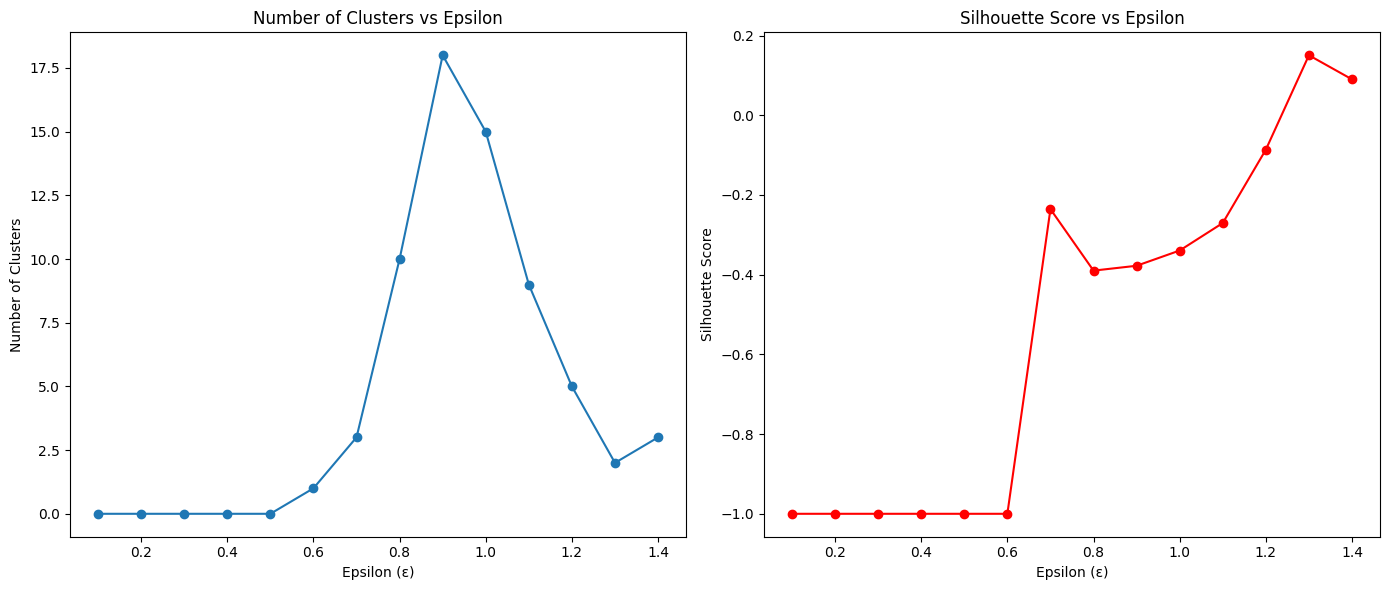

In [175]:
# Setting predictor variables as feature
featureAlt = predictorVar

# Standardize the features
scaledFeaturesAlt = scaler.fit_transform(featureAlt)

# Set range of epsilon values for DBSCAN
eps_range = np.arange(0.1, 1.5, 0.1)
min_samples = 10
silhouette_scores = []
num_clusters_list = []

# Perform DBSCAN for different epsilon values
for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(scaledFeaturesAlt)
    
    # Calculate the number of clusters (ignoring noise cluster -1)
    num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    num_clusters_list.append(num_clusters)
    
    # Compute silhouette score if there is more than 1 cluster
    if num_clusters > 1:
        silhouette = silhouette_score(scaledFeaturesAlt, cluster_labels)
        silhouette_scores.append(silhouette)
    else:
        silhouette_scores.append(-1)  # Invalid score for 1 cluster

# Plot number of clusters and silhouette score vs. epsilon
plt.figure(figsize=(14, 6))

# Number of clusters
plt.subplot(1, 2, 1)
plt.plot(eps_range, num_clusters_list, marker='o')
plt.title('Number of Clusters vs Epsilon')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Number of Clusters')

# Silhouette score
plt.subplot(1, 2, 2)
plt.plot(eps_range, silhouette_scores, marker='o', color='r')
plt.title('Silhouette Score vs Epsilon')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Silhouette Score')

plt.tight_layout()

The optimal epsilon ($\epsilon$) for DBSCAN, based on the silhouette score, is approximately 1.3, with a maximum silhouette score near 0.17 or 0.18 approximately from the graph above.

In [176]:
# As per the above graph
optimal_epsilon = 1.3
# Perform DBSCAN with the optimal epsilon value
optimal_dbscan = DBSCAN(eps=optimal_epsilon, min_samples=min_samples)
optimal_labels = optimal_dbscan.fit_predict(scaled_features)

# Add cluster labels to the dataset for visualization
combinedWine['cluster_alt'] = optimal_labels

Creating a new column `cluster_alt` for visualixzation of data after DBSCAN.

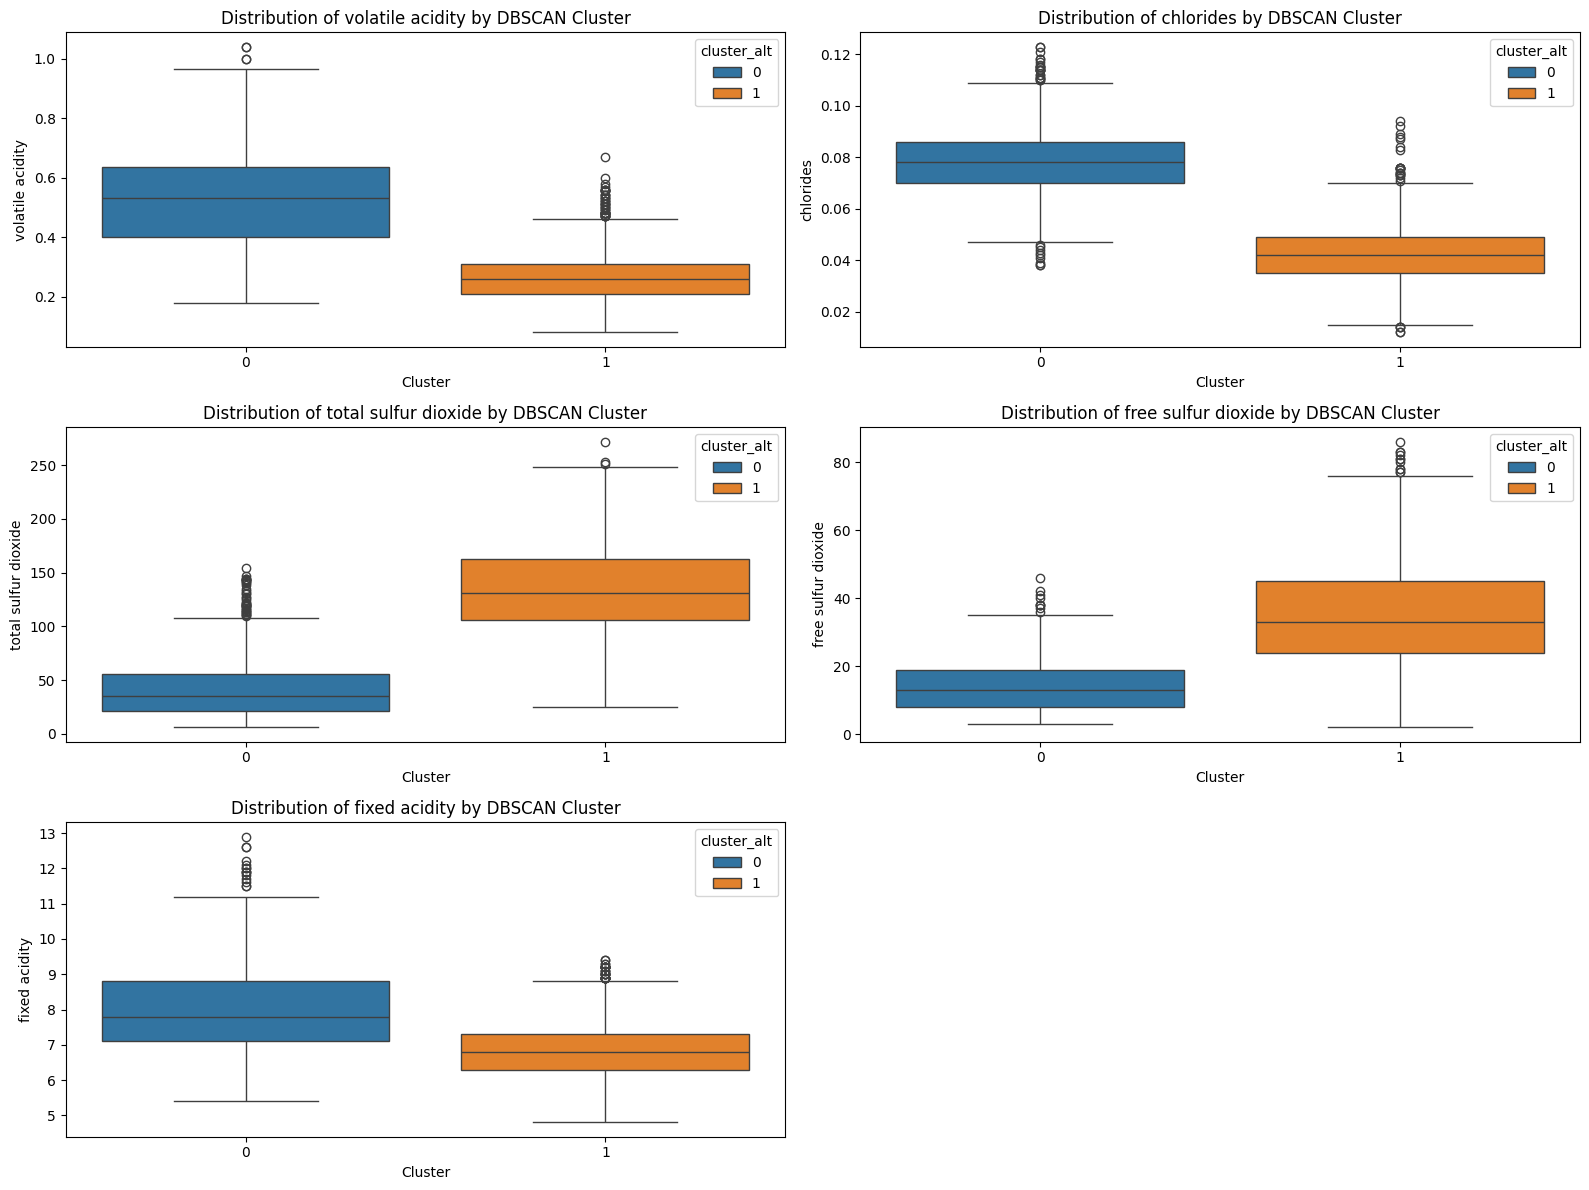

(['volatile acidity',
  'chlorides',
  'total sulfur dioxide',
  'free sulfur dioxide',
  'fixed acidity'],
 {'volatile acidity': 0.0,
  'chlorides': 0.0,
  'total sulfur dioxide': 0.0,
  'free sulfur dioxide': 8.213465047399023e-270,
  'fixed acidity': 4.006414228659064e-246})

In [177]:
# Group the data by clusters
# Exclude noise points (-1)
clustered_data = combinedWine[combinedWine['cluster_alt'] != -1]  
clusters = clustered_data['cluster_alt'].unique()

# Prepare a dictionary to store ANOVA results
anova_results = {}

# Perform ANOVA on each feature
for column in features.columns:
    # Collect values for each cluster
    cluster_values = [clustered_data[clustered_data['cluster_alt'] == cluster][column] for cluster in clusters]
    # Perform ANOVA
    f_stat, p_value = f_oneway(*cluster_values)
    anova_results[column] = p_value

# Sort variables by their p-value (lower means more discriminatory)
sorted_anova_results = sorted(anova_results.items(), key=lambda x: x[1])

# Get the top 5 most discriminatory variables
most_discriminatory = [var[0] for var in sorted_anova_results[:5]]

# Visualize the distributions of the most discriminatory variables
plt.figure(figsize=(16, 12))

for i, column in enumerate(most_discriminatory, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(
        data=clustered_data,
        x='cluster_alt',
        y=column,
        palette='tab10',
        hue='cluster_alt'
    )
    plt.title(f'Distribution of {column} by DBSCAN Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

# Display the top 5 discriminatory variables with their ANOVA p-values
most_discriminatory, {var[0]: var[1] for var in sorted_anova_results[:5]}


Getting the most discriminatory variables using DBSCAN we get:

Volatile Acidity<br>
Chlorides<br>
Free Sulfur Dioxide<br>
Total Sulfur Dioxide<br>
Fixed Acidity<br>

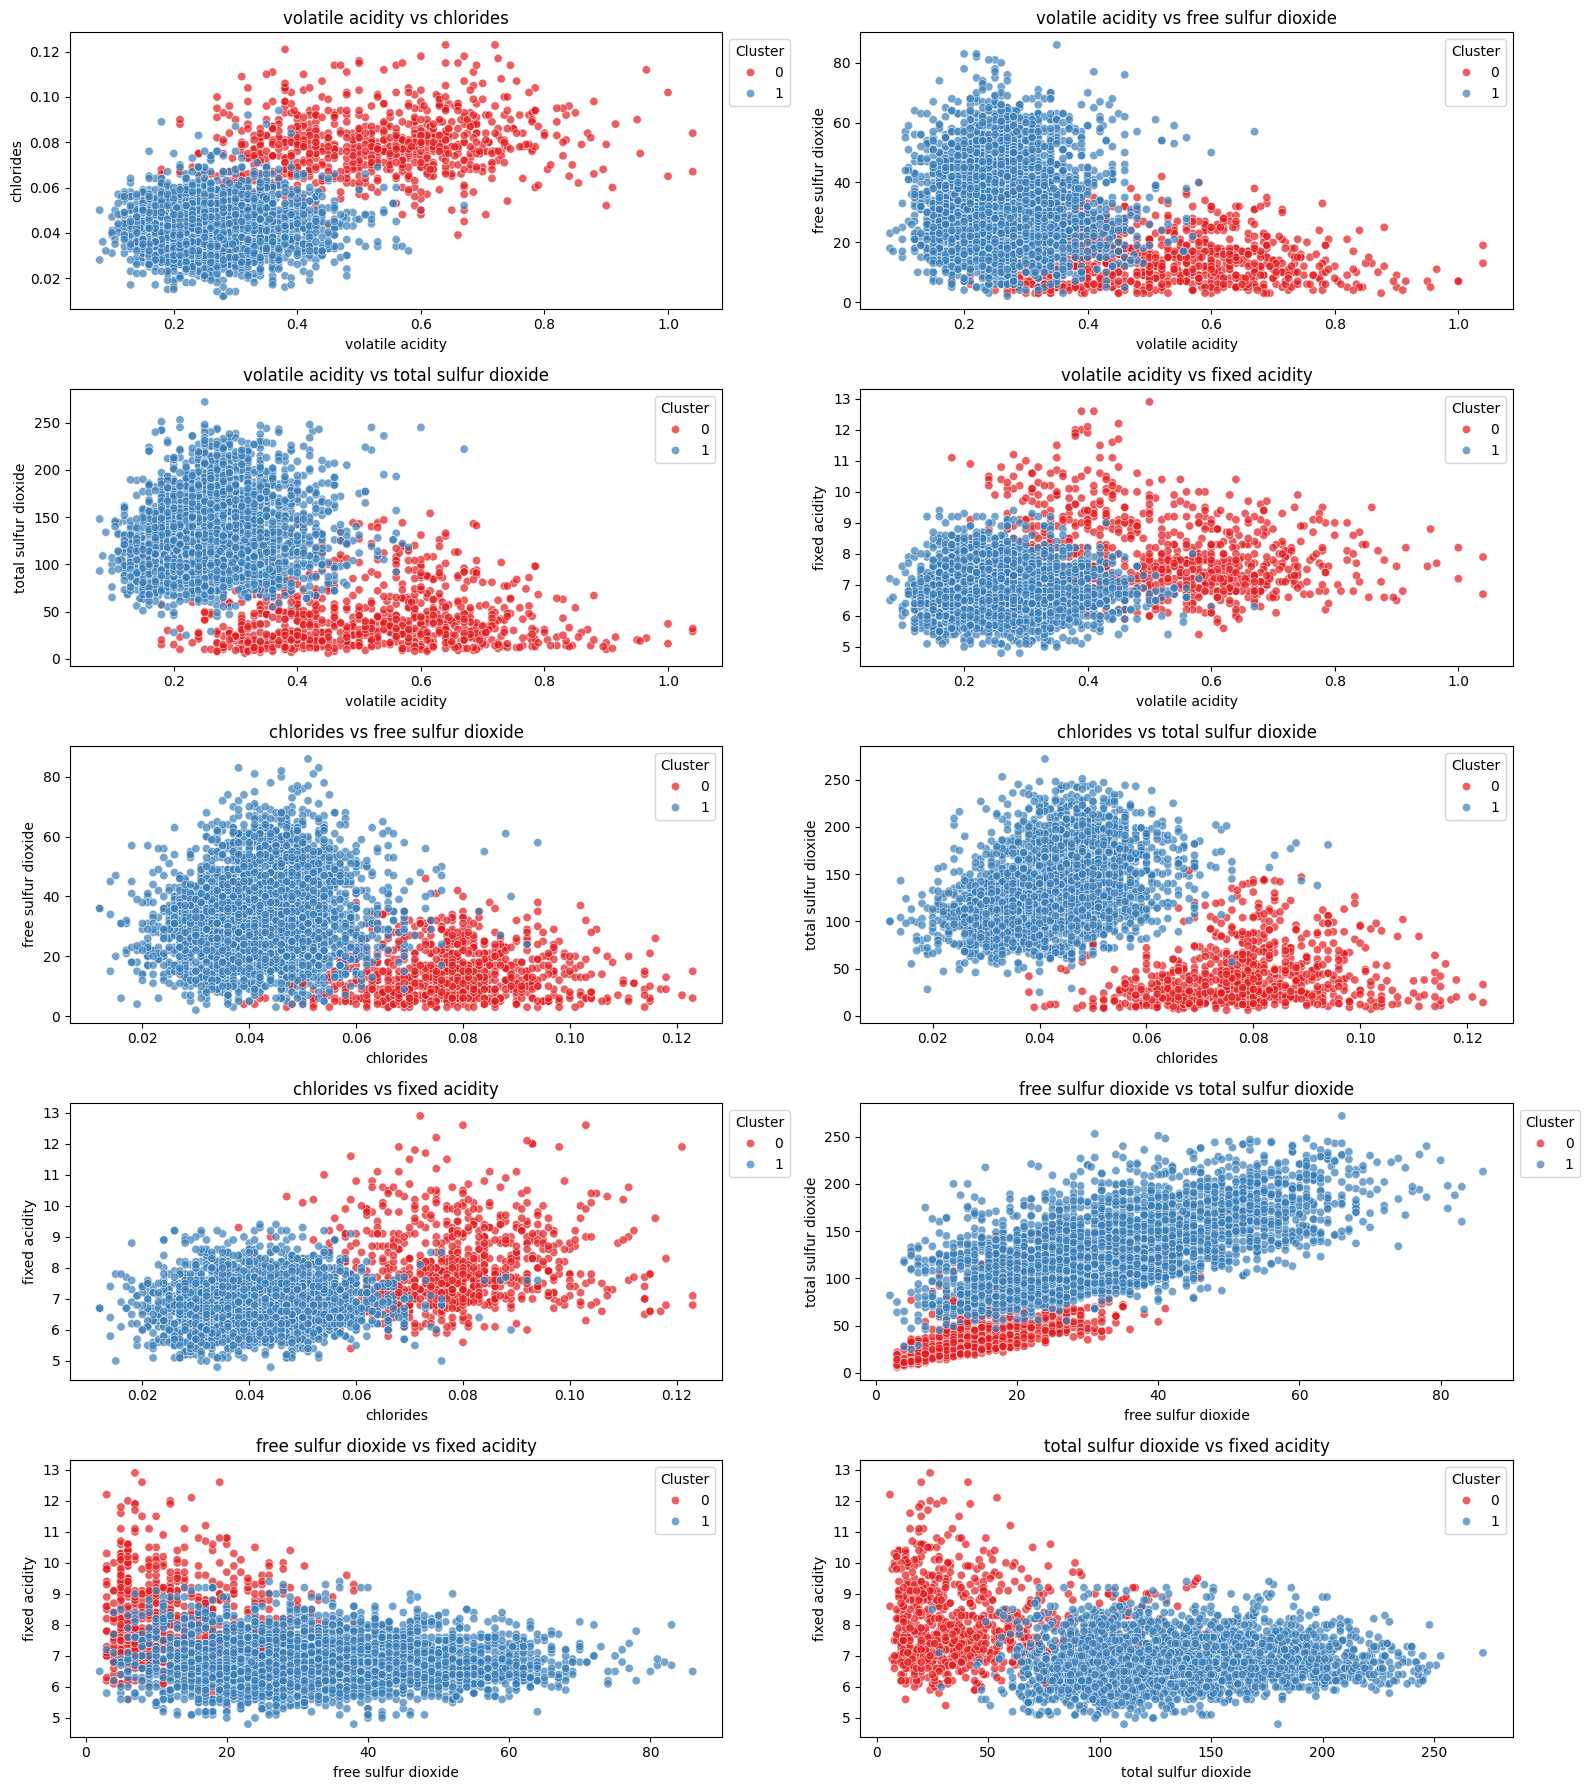

In [178]:
# Create scatter plots for the most discriminatory variables
scatter_pairs = [
   'volatile acidity',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'fixed acidity'
]

# Generate scatter plots for variable pairs
plt.figure(figsize=(16, 18))

plot_idx = 1
for i in range(len(scatter_pairs)):
    for j in range(i + 1, len(scatter_pairs)):
        plt.subplot(5, 2, plot_idx)
        sns.scatterplot(
            data=clustered_data,
            x=scatter_pairs[i],
            y=scatter_pairs[j],
            hue='cluster_alt',
            palette='Set1',
            alpha=0.7
        )
        plt.title(f'{scatter_pairs[i]} vs {scatter_pairs[j]}')
        plt.legend(title='Cluster', bbox_to_anchor=(1, 1))
        plot_idx += 1

plt.tight_layout()

Based on the patterns observed in the abvove plots, several key insights can be drawn:
<br>

**Volatile Acidity vs Chlorides:**<br>
The data points are clearly divided into two distinct clusters, suggesting that volatile acidity and chlorides are effective in discriminating between different wine samples.<br>
Cluster 0 wines generally have higher volatile acidity and chloride levels compared to Cluster 1 wines.<br>
<br>

**Volatile Acidity vs Free Sulfur Dioxide:**<br>
The clusters are well-separated, indicating that volatile acidity and free sulfur dioxide are useful in distinguishing between wine types.<br>
Cluster 0 wines have a wider range of volatile acidity and free sulfur dioxide levels compared to Cluster 1 wines.<br>
<br>

**Volatile Acidity vs Total Sulfur Dioxide:**<br>
The data shows a strong positive correlation between volatile acidity and total sulfur dioxide, with the two clusters being clearly differentiated.<br>
Cluster 0 wines exhibit higher volatile acidity and total sulfur dioxide levels than Cluster 1 wines.<br>
<br>

**Chlorides vs Free Sulfur Dioxide:**<br>
The clusters are well-defined, suggesting that chlorides and free sulfur dioxide are effective in discriminating between wine samples.<br>
Cluster 0 wines generally have higher chloride and free sulfur dioxide levels compared to Cluster 1 wines.<br>
<br>

**Chlorides vs Fixed Acidity:**<br>
The data points form a distinctive pattern, with the two clusters being clearly separated along the chlorides and fixed acidity axes.<br>
Cluster 0 wines tend to have higher chloride and fixed acidity levels than Cluster 1 wines.<br>
<br>

**Free Sulfur Dioxide vs Fixed Acidity:**<br>
The scatter plot reveals a negative correlation between free sulfur dioxide and fixed acidity, with the clusters being well-differentiated.<br>
Cluster 0 wines have a wider range of free sulfur dioxide and fixed acidity levels compared to Cluster 1 wines.<br>
<br>

**Free Sulfur Dioxide vs Total Sulfur Dioxide:**<br>
The data points form a clear linear relationship, with the two clusters being distinct.<br>
Cluster 0 wines generally have higher free sulfur dioxide and total sulfur dioxide levels compared to Cluster 1 wines.<br>
<br>

**Total Sulfur Dioxide vs Fixed Acidity:**<br>
The scatter plot shows a positive correlation between total sulfur dioxide and fixed acidity, with the clusters being well-separated.<br>
Cluster 0 wines have a broader range of total sulfur dioxide and fixed acidity values than Cluster 1 wines.<br>

<div style="page-break-after: always;"></div>

# Code of Honour


I confirm that all work submitted is my own and that I have neither given, sought, nor
received aid in relation to this assignment.

-- Sarosh Farhan (24210969)